# Overview
This is a different project. I'm not providing you with a notebook with detailed instructions. You need to do the work yourself, so this is more of a choose your own adventure! You recently joined Boston Consulting Group, and you have been hired to clean up a mess left by a previous consultant for the City of Boston. Your task is the following:

- Perform exploratory data analysis to understand what variables were influential in predicting house prices.

- Your predecessor has built 2 linear regression models to predict the av_total (assessed value) of properties in the greater Boston area. Given the prediction results, identify which model is the best

- Based on the best regression model you justified, identify the top 10 best predictions, top 10 overestimates predictions, and top 10 underestimates predictions


In [2]:
import warnings
warnings.filterwarnings('ignore')
# --------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# --------------------------------
# Suppress scientific notation in the notebook for pandas DataFrame
pd.set_option('display.float_format', '{:.4f}'.format)

In [3]:
boston = pd.read_csv('/content/boston.csv')
print(boston.info())
boston.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14225 entries, 0 to 14224
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pid              14225 non-null  int64  
 1   zipcode          14225 non-null  int64  
 2   own_occ          14225 non-null  object 
 3   land_sf          14221 non-null  float64
 4   yr_built         14225 non-null  int64  
 5   yr_remod         13714 non-null  float64
 6   living_area      14225 non-null  int64  
 7   num_floors       14225 non-null  float64
 8   structure_class  14225 non-null  object 
 9   r_bldg_styl      14225 non-null  object 
 10  r_roof_typ       14225 non-null  object 
 11  r_ext_fin        14225 non-null  object 
 12  r_total_rms      14225 non-null  int64  
 13  r_bdrms          14225 non-null  int64  
 14  r_full_bth       14225 non-null  int64  
 15  r_half_bth       14225 non-null  int64  
 16  r_bth_style      14225 non-null  object 
 17  r_kitch     

pid  zipcode own_occ    land_sf  yr_built  yr_remod  living_area  \
0   10     2136       Y 10288.0000      1992    0.0000         1681   
1   20     2132       Y 10148.0000      1900 2016.0000         3024   
2   30     2132       Y  8512.0000      1920    0.0000         1160   
3   40     2124       Y  3187.0000      1900 2001.0000         1868   
4   50     2136       Y 10088.0000      1971 1975.0000         1534   

   num_floors structure_class r_bldg_styl  ... r_ovrall_cnd r_int_cnd  \
0      1.0000               R          RR  ...            A         A   
1      2.5000               R          CL  ...            G         G   
2      2.0000               R          CL  ...            A         A   
3      2.0000               R          CL  ...            G         A   
4      1.0000               R          RR  ...            A         A   

   r_int_fin  r_view   zip  population pop_density  median_income  \
0          N       A  2136       28488        6207          58890   
1          N       G  2132       36314       13251          75446   
2          N       A  2132       36314       13251          75446   
3          N       F  2124       47783       15913          48841   
4          N       G  2136       28488        6207          58890   

              city_state    av_total  
0          Hyde Park, MA 321200.0000  
1          Cambridge, MA 845475.9346  
2          Cambridge, MA 401230.0313  
3  Dorchester Center, MA 450500.0000  
4          Hyde Park, MA 368094.7401  

[5 rows x 33 columns]

In [4]:
boston['yr_remod']

0          0.0000
1       2016.0000
2          0.0000
3       2001.0000
4       1975.0000
           ...   
14220   1995.0000
14221   2004.0000
14222      0.0000
14223      0.0000
14224      0.0000
Name: yr_remod, Length: 14225, dtype: float64

#  Null Analysis


---


- Load the data: .read_csv()
- Basic data summary: .info()
- Transform & Clean
  - fix data types
  - clean up data
  - create new variables

In [5]:
# drop 4 land_sf null rows
boston.dropna(subset=['land_sf'],inplace=True)
boston.isnull().sum()

pid                  0
zipcode              0
own_occ              0
land_sf              0
yr_built             0
yr_remod           509
living_area          0
num_floors           0
structure_class      0
r_bldg_styl          0
r_roof_typ           0
r_ext_fin            0
r_total_rms          0
r_bdrms              0
r_full_bth           0
r_half_bth           0
r_bth_style          0
r_kitch              0
r_kitch_style        0
r_heat_typ           0
r_ac                 0
r_fplace             0
r_ext_cnd            0
r_ovrall_cnd         0
r_int_cnd            0
r_int_fin            0
r_view               0
zip                  0
population           0
pop_density          0
median_income        0
city_state           0
av_total             0
dtype: int64

In [6]:
# drop yr_remod null columns
boston['yr_remod']=np.where(boston['yr_remod']==0, boston['yr_built'],boston['yr_remod'] )
boston['yr_remod']
# columns_to_drop = ['yr_remod']
# boston = boston.drop(columns=columns_to_drop)
# boston

0       1992.0000
1       2016.0000
2       1920.0000
3       2001.0000
4       1975.0000
           ...   
14220   1995.0000
14221   2004.0000
14222   1928.0000
14223   1925.0000
14224   1945.0000
Name: yr_remod, Length: 14221, dtype: float64

In [7]:
boston

pid  zipcode own_occ    land_sf  yr_built  yr_remod  living_area  \
0          10     2136       Y 10288.0000      1992 1992.0000         1681   
1          20     2132       Y 10148.0000      1900 2016.0000         3024   
2          30     2132       Y  8512.0000      1920 1920.0000         1160   
3          40     2124       Y  3187.0000      1900 2001.0000         1868   
4          50     2136       Y 10088.0000      1971 1975.0000         1534   
...       ...      ...     ...        ...       ...       ...          ...   
14220  142210     2124       Y  3717.0000      1925 1995.0000         1703   
14221  142220     2132       Y  3895.0000      1920 2004.0000         1350   
14222  142230     2132       Y  4700.0000      1928 1928.0000         1490   
14223  142240     2124       Y  5250.0000      1925 1925.0000         1404   
14224  142250     2136       Y  5000.0000      1945 1945.0000         1157   

       num_floors structure_class r_bldg_styl  ... r_ovrall_cnd r_int_cnd  \
0          1.0000               R          RR  ...            A         A   
1          2.5000               R          CL  ...            G         G   
2          2.0000               R          CL  ...            A         A   
3          2.0000               R          CL  ...            G         A   
4          1.0000               R          RR  ...            A         A   
...           ...             ...         ...  ...          ...       ...   
14220      2.0000               R          CL  ...            A         A   
14221      2.0000               R          CL  ...            A         G   
14222      2.0000               R          CL  ...            A         G   
14223      2.0000               R          CL  ...            A         A   
14224      1.5000               R          CP  ...            A         A   

       r_int_fin  r_view   zip  population pop_density  median_income  \
0              N       A  2136       28488        6207          58890   
1              N       G  2132       36314       13251          75446   
2              N       A  2132       36314       13251          75446   
3              N       F  2124       47783       15913          48841   
4              N       G  2136       28488        6207          58890   
...          ...     ...   ...         ...         ...            ...   
14220          N       A  2124       47783       15913          48841   
14221          N       A  2132       36314       13251          75446   
14222          N       A  2132       36314       13251          75446   
14223          N       A  2124       47783       15913          48841   
14224          N       A  2136       28488        6207          58890   

                  city_state    av_total  
0              Hyde Park, MA 321200.0000  
1              Cambridge, MA 845475.9346  
2              Cambridge, MA 401230.0313  
3      Dorchester Center, MA 450500.0000  
4              Hyde Park, MA 368094.7401  
...                      ...         ...  
14220  Dorchester Center, MA 380800.0000  
14221          Cambridge, MA 420100.0000  
14222          Cambridge, MA 510200.0000  
14223  Dorchester Center, MA 406400.0000  
14224          Hyde Park, MA 294367.7840  

[14221 rows x 33 columns]

# Categorical analysis


In [8]:
categorical_features = boston.select_dtypes(include=['object'])
categorical_features.columns


Index(['own_occ', 'structure_class', 'r_bldg_styl', 'r_roof_typ', 'r_ext_fin',
       'r_bth_style', 'r_kitch_style', 'r_heat_typ', 'r_ac', 'r_ext_cnd',
       'r_ovrall_cnd', 'r_int_cnd', 'r_int_fin', 'r_view', 'city_state'],
      dtype='object')

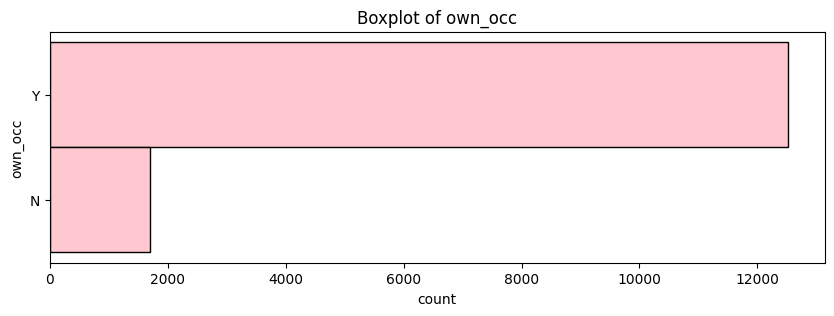

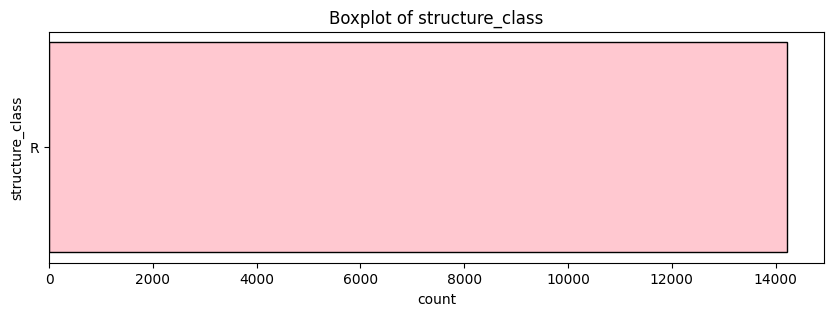

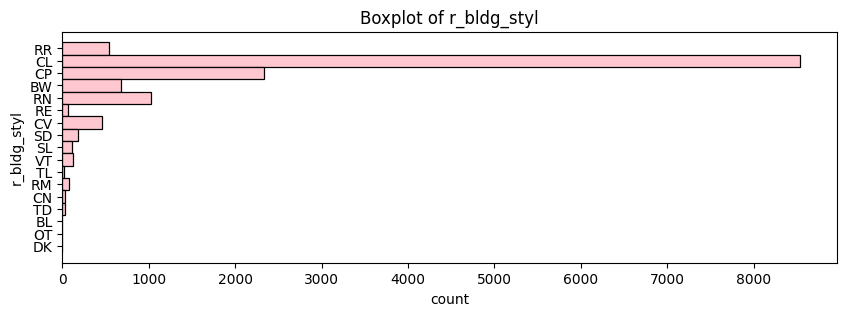

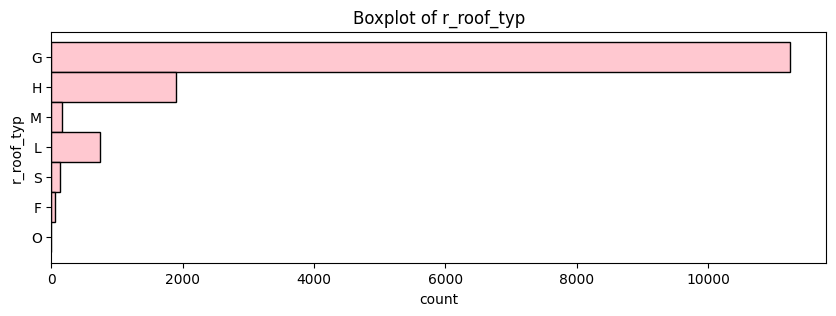

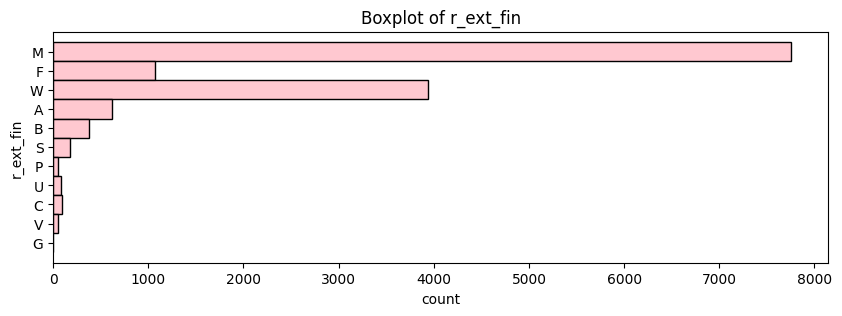

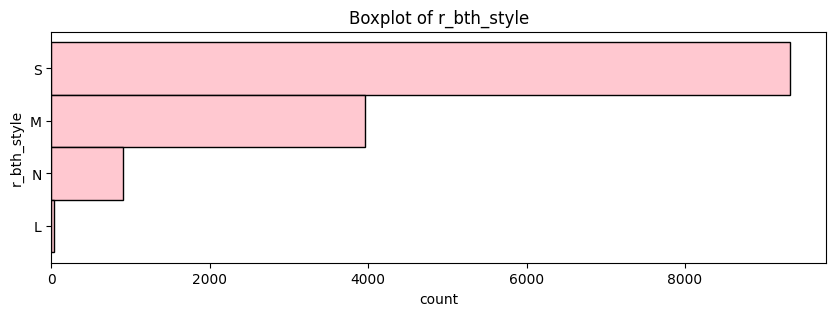

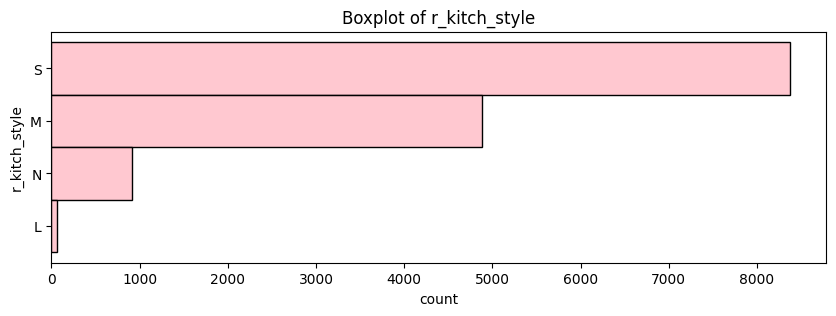

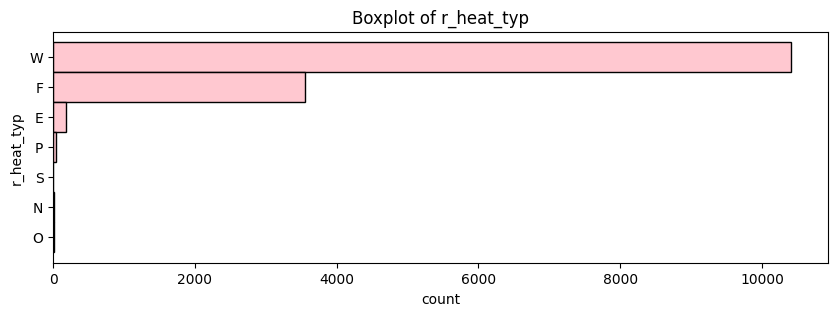

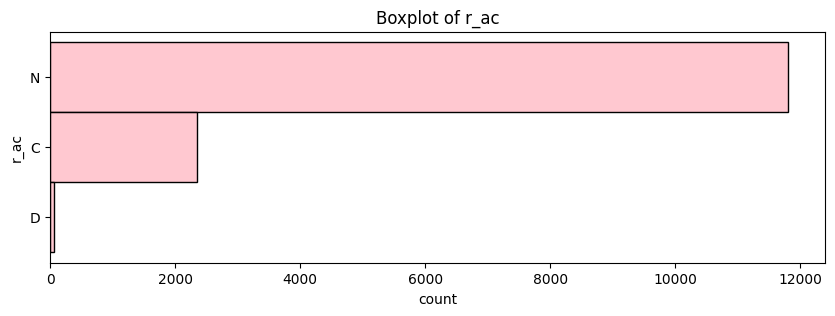

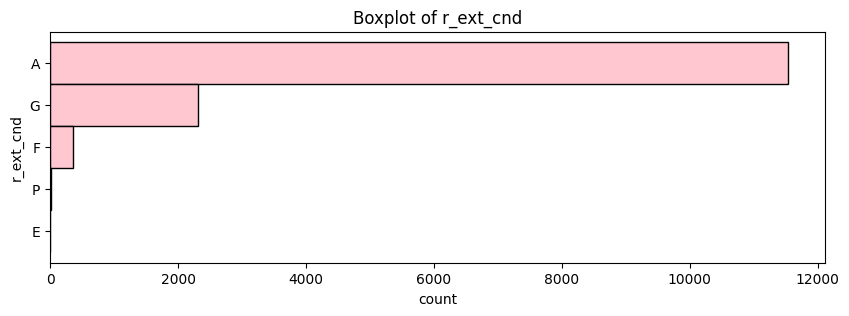

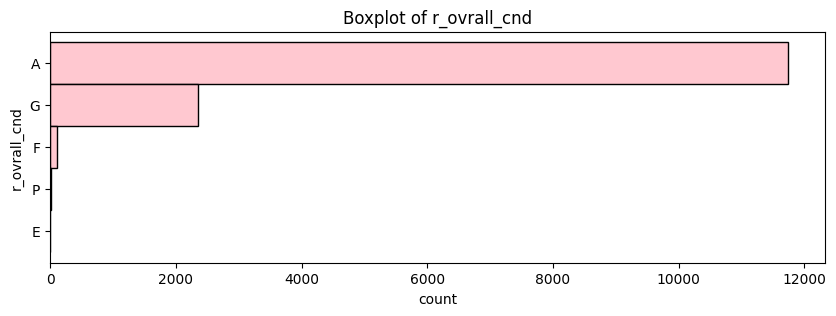

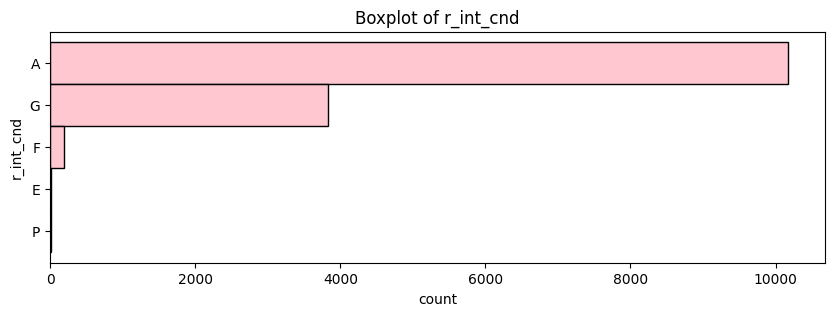

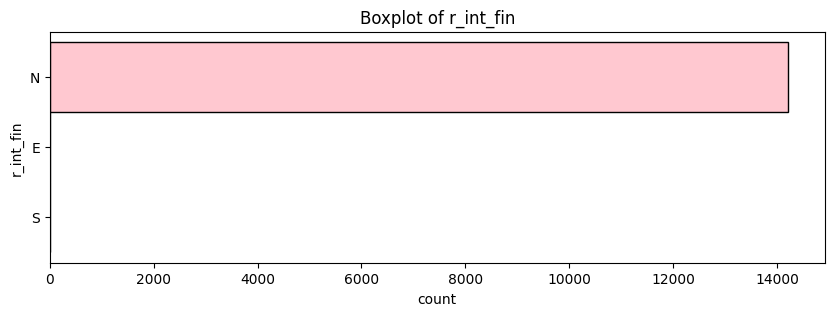

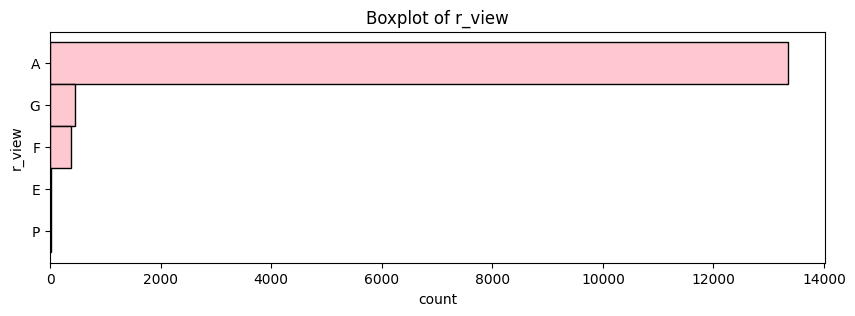

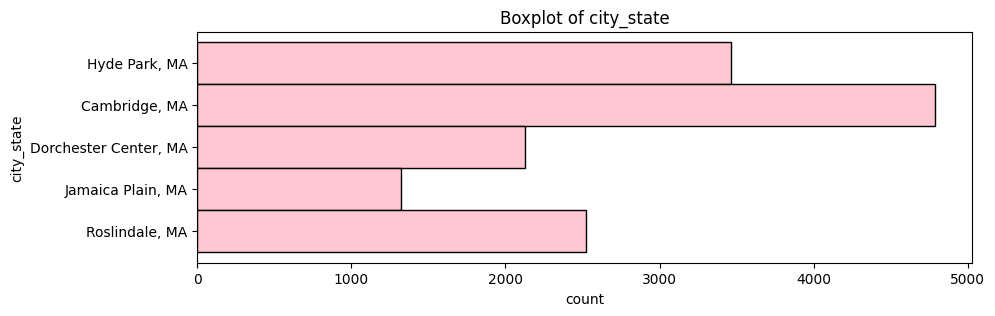

In [9]:
for feature in categorical_features:
  # Set the figure size
  plt.figure(figsize=(10, 3))
  # Create the histogram using seaborn
  sns.histplot(y=boston[feature], data=boston, color = 'lightpink')
  # Set the title and x-label
  plt.title(f'Boxplot of {feature}')
  plt.xlabel('count')
  # Display the plot
  plt.show()


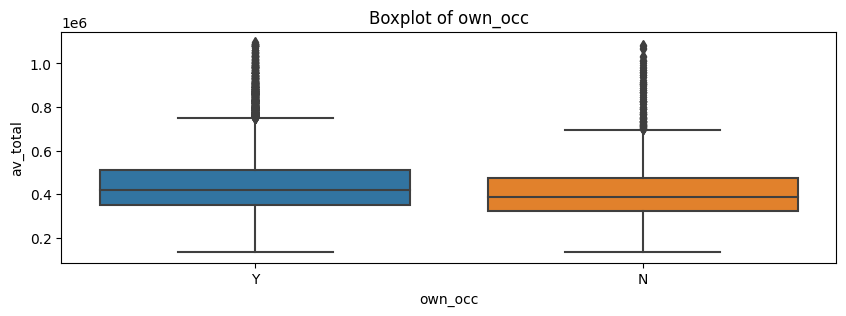

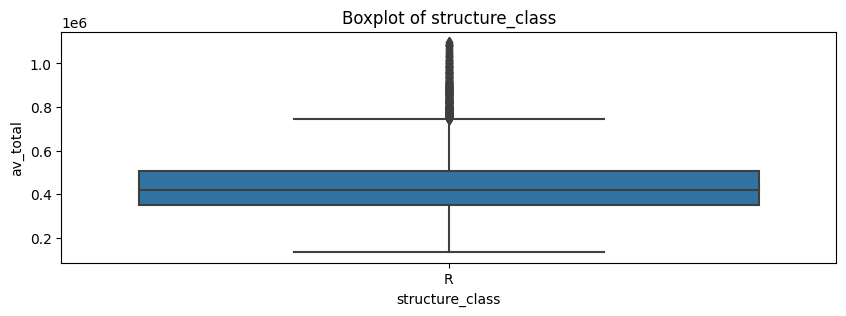

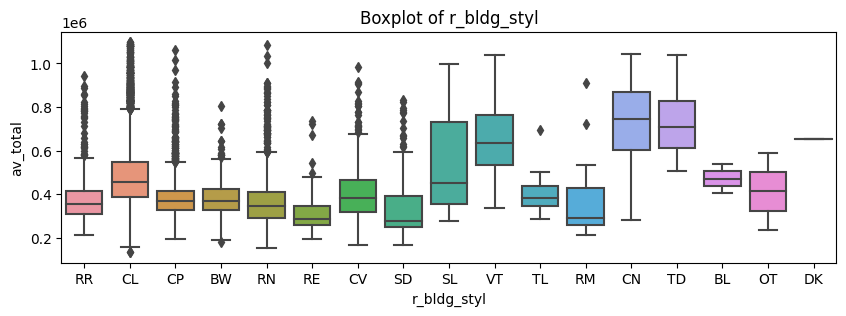

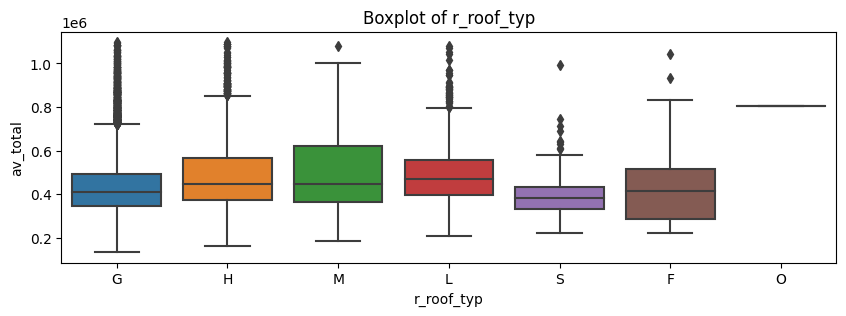

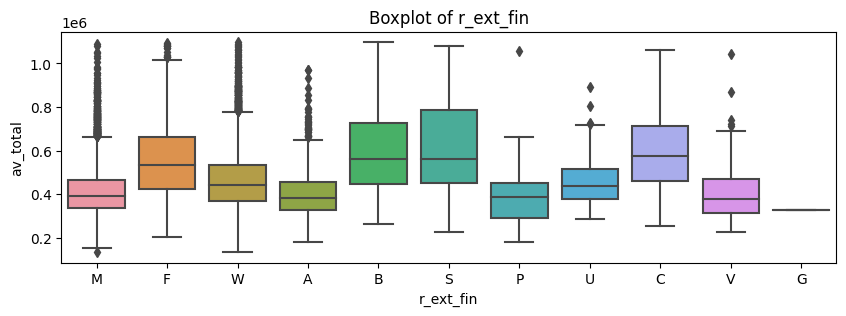

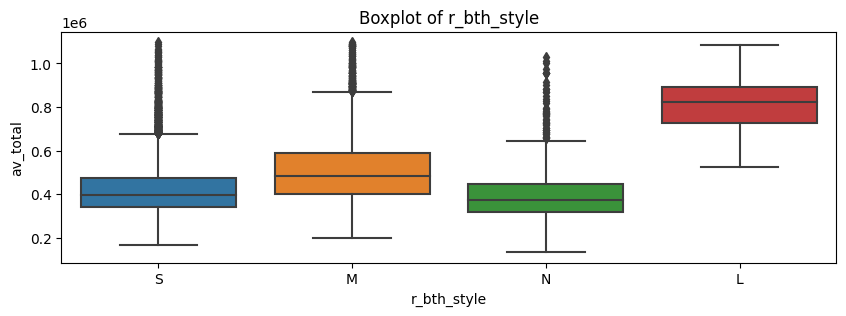

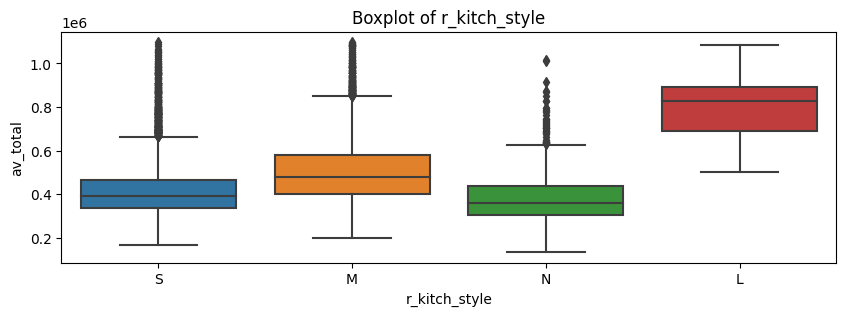

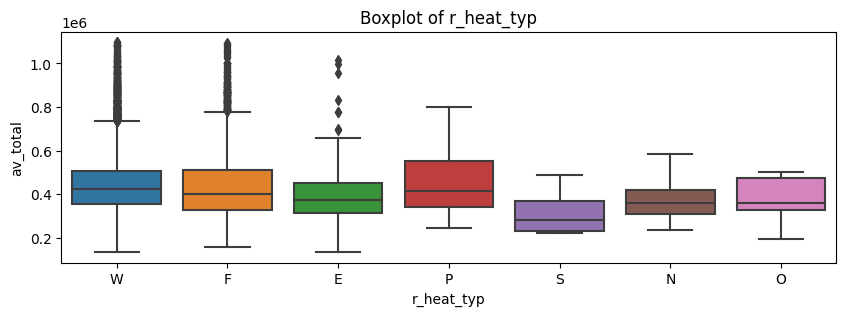

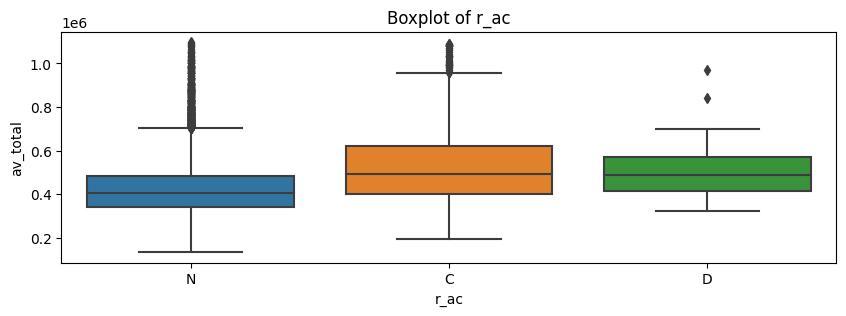

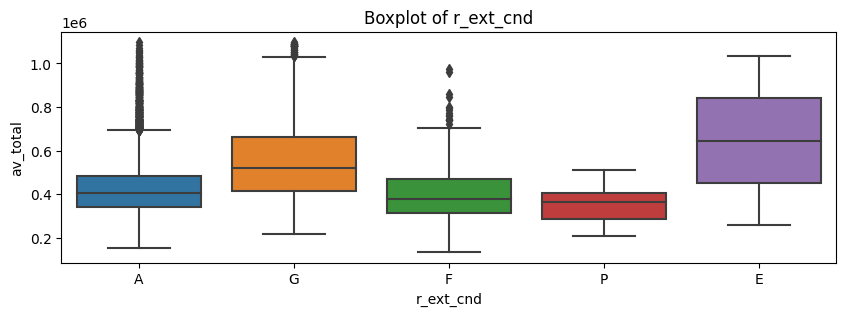

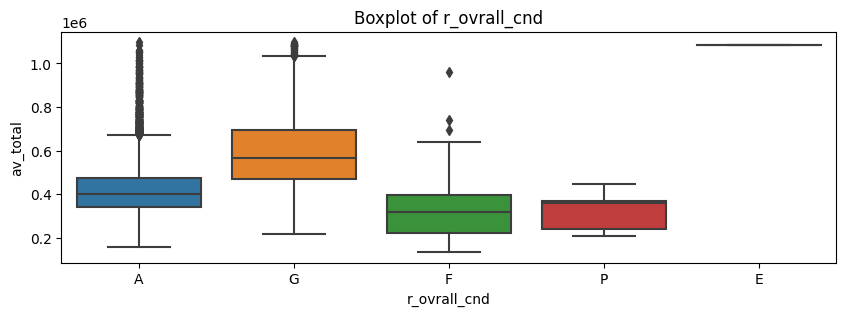

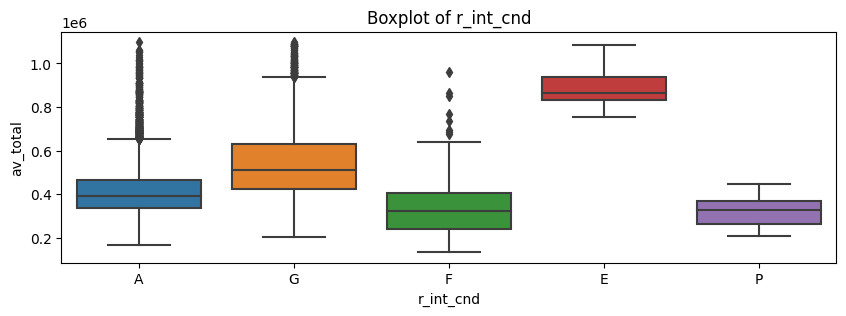

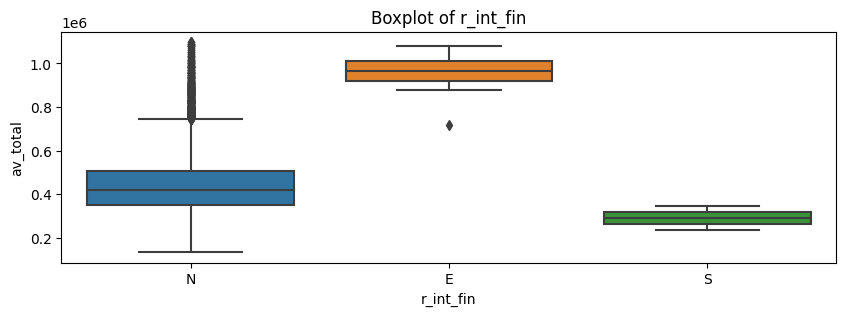

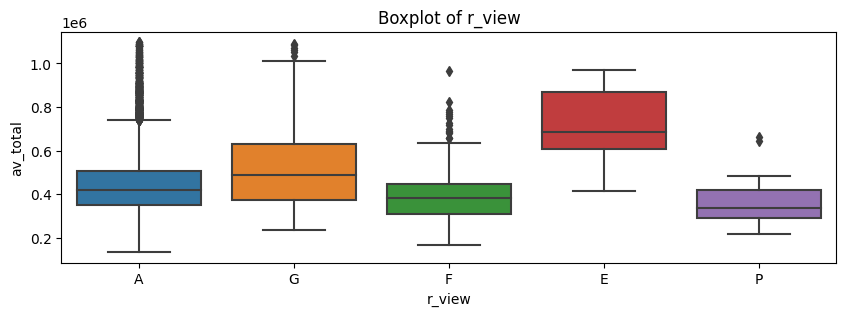

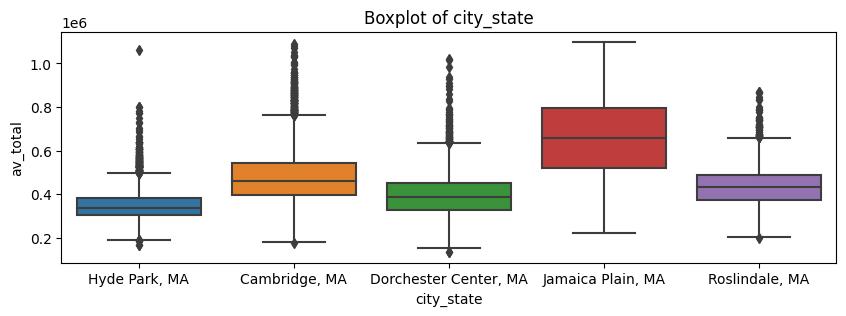

In [10]:
for feature in categorical_features:
  # Set the figure size
  plt.figure(figsize=(10, 3))
  # Create the histogram using seaborn
  sns.boxplot(x=boston[feature],y=boston['av_total'], data=boston)
  # Set the title and x-label
  plt.title(f'Boxplot of {feature}')
  plt.xlabel(feature)
  # Display the plot
  plt.show()


# Numeric analysis

In [11]:
numeric_features = boston.select_dtypes(include = [np.number])
numeric_features.columns
numeric_features_selected = ['land_sf', 'yr_built', 'yr_remod', 'living_area',
       'r_total_rms', 'r_bdrms', 'r_full_bth', 'r_half_bth', 'r_kitch',
       'r_fplace', 'zip', 'population', 'pop_density', 'median_income',
       'av_total']

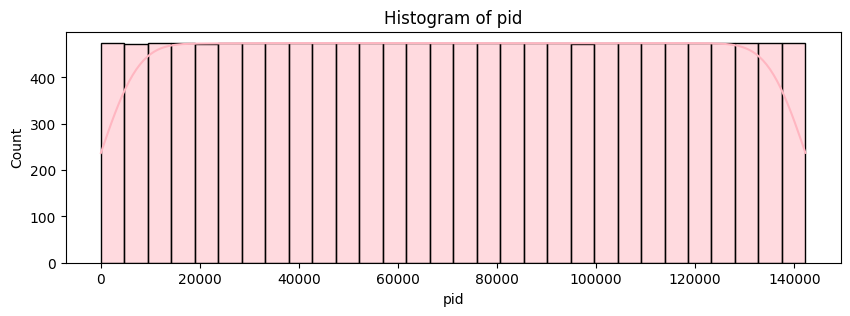

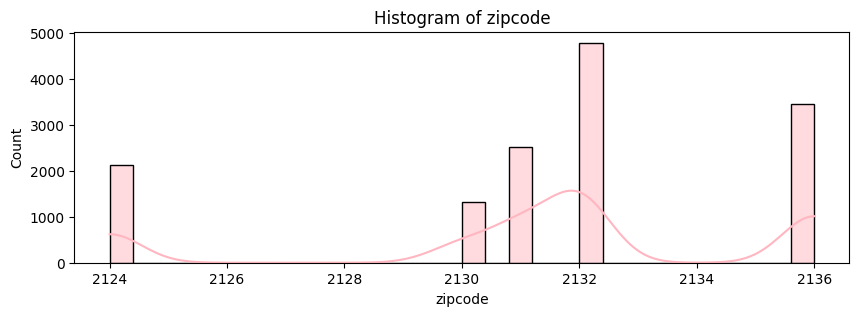

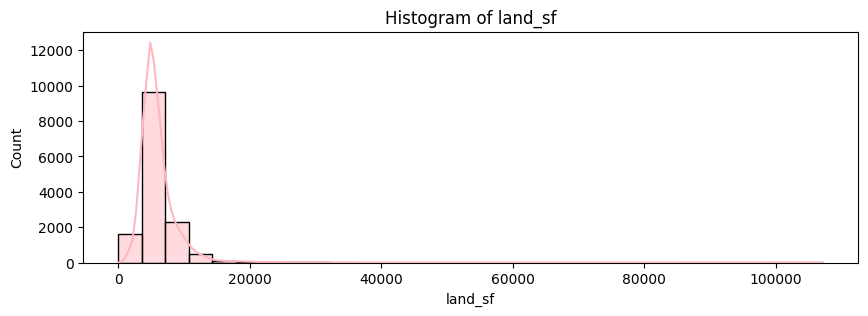

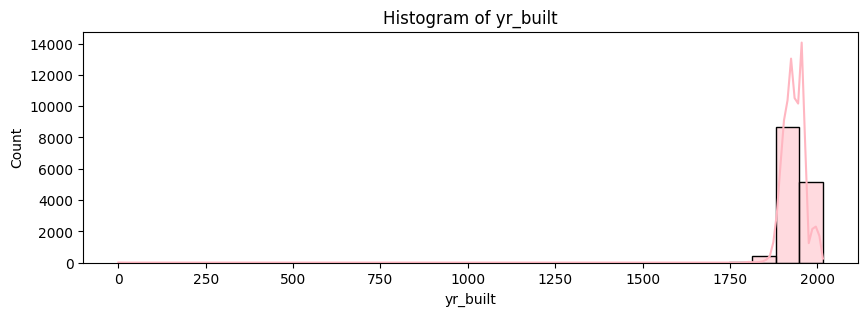

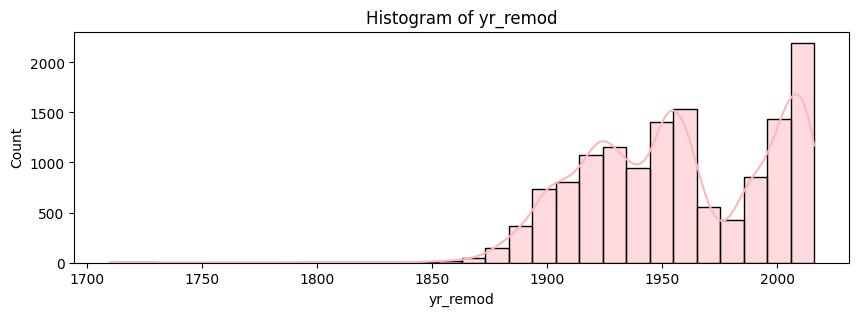

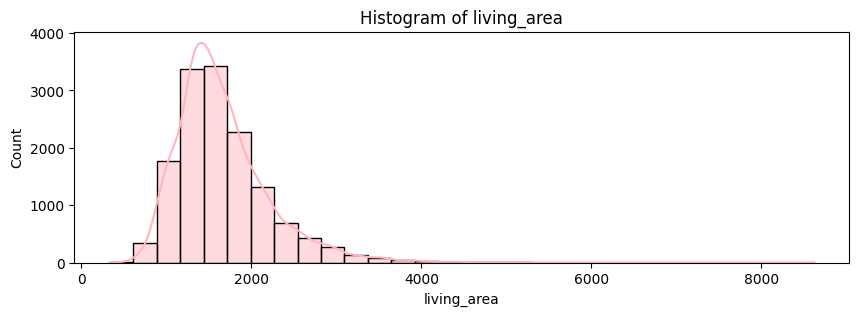

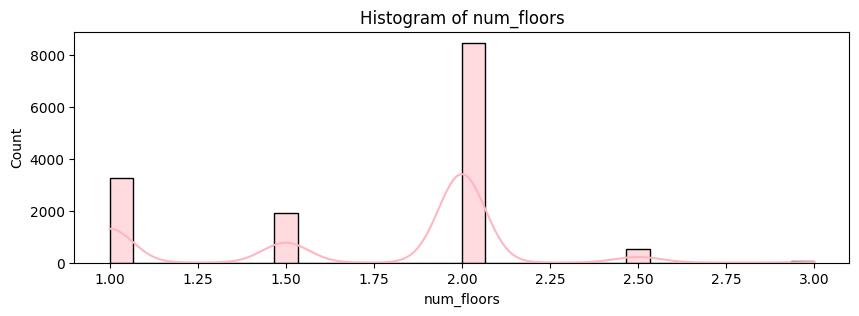

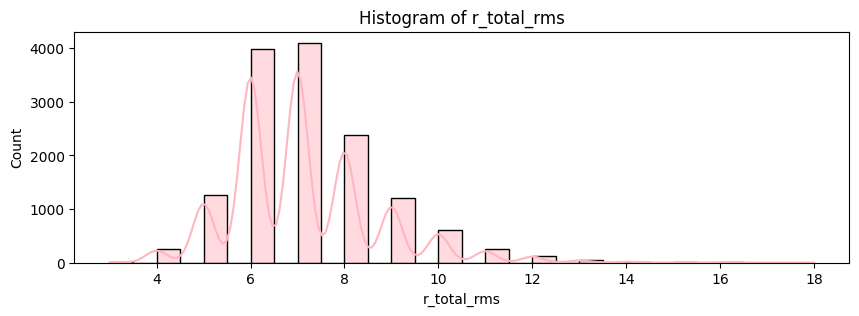

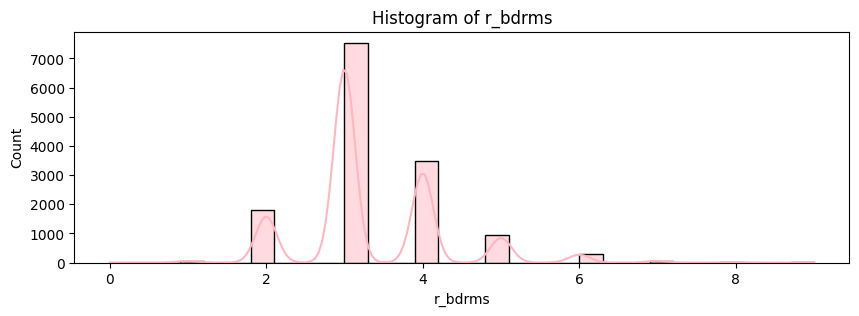

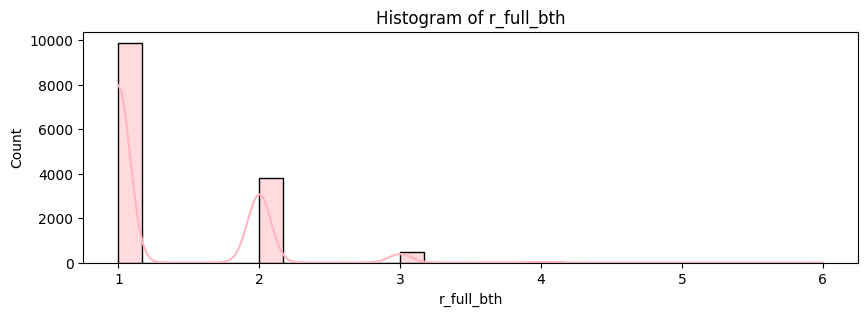

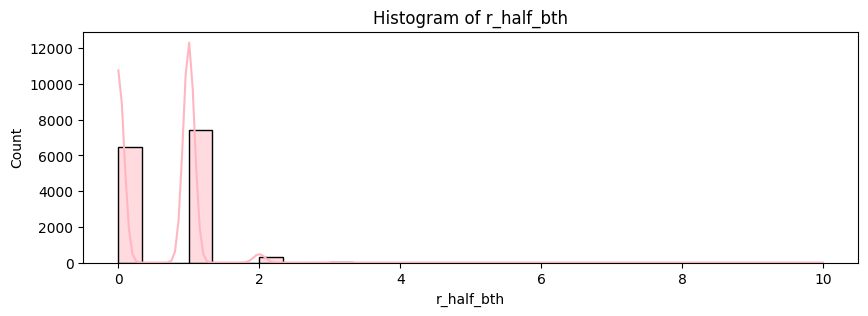

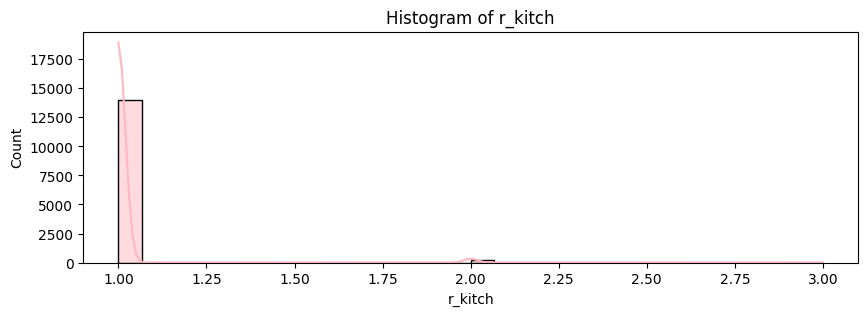

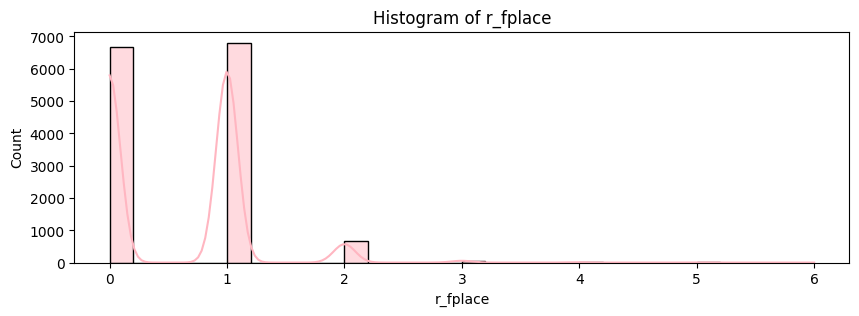

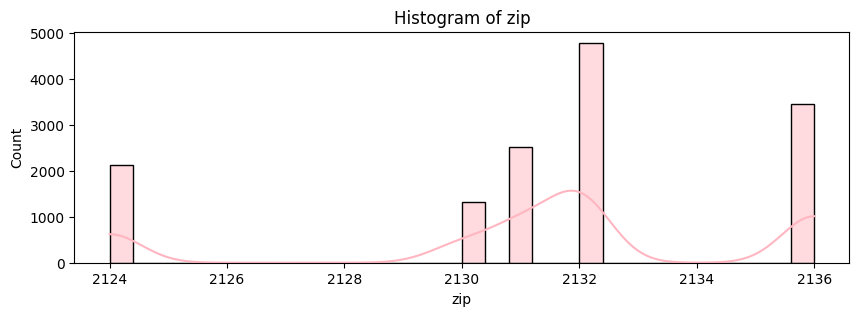

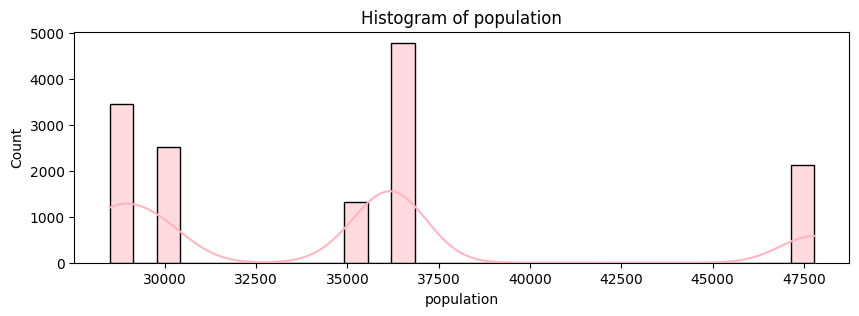

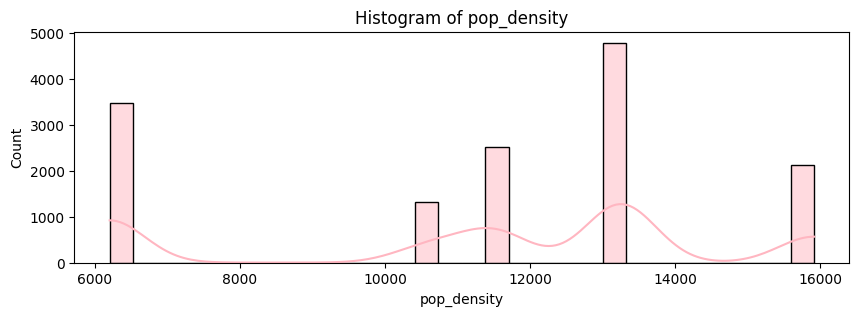

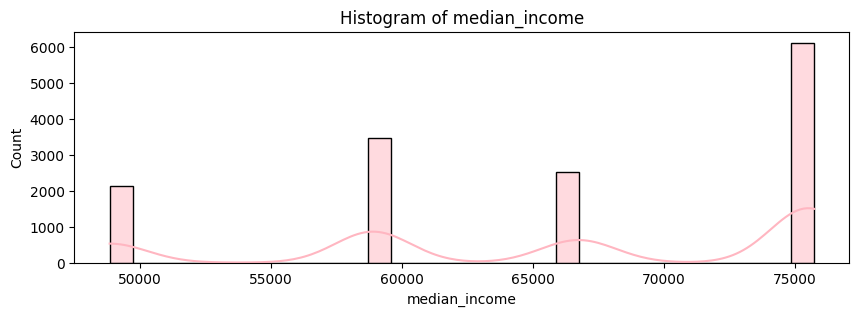

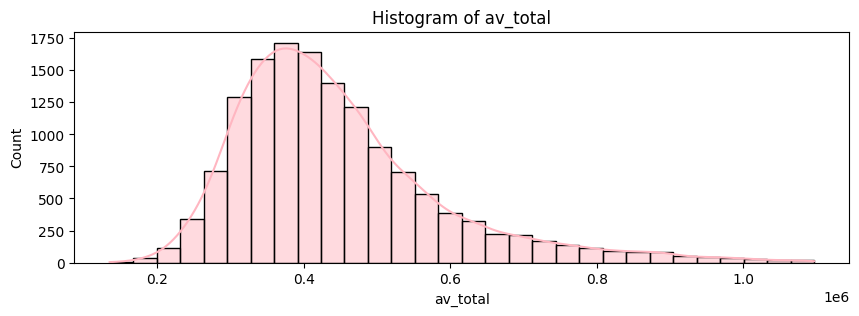

In [12]:
for feature in numeric_features:

  # Set the figure size
  plt.figure(figsize=(10, 3))
  # Create the histogram using seaborn
  sns.histplot(boston,x=feature, bins=30, kde=True, color='lightpink')
  # Set the title and x-label
  plt.title(f'Histogram of {feature}')
  plt.xlabel(feature)
  # Display the plot
  plt.show()

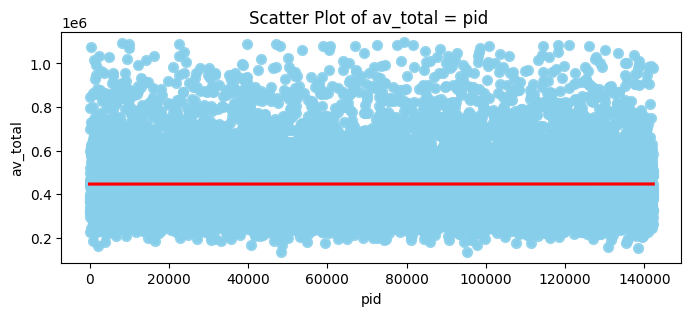

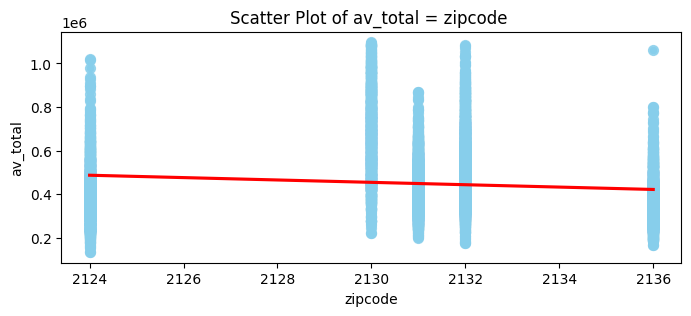

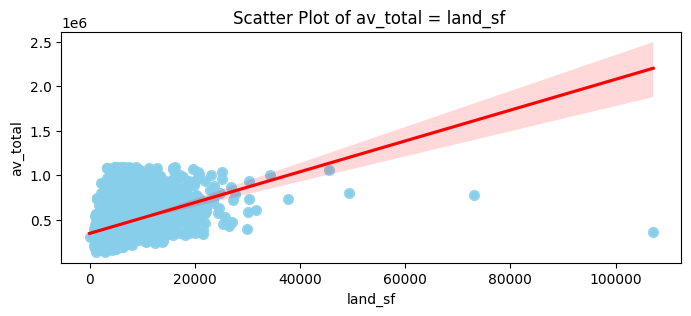

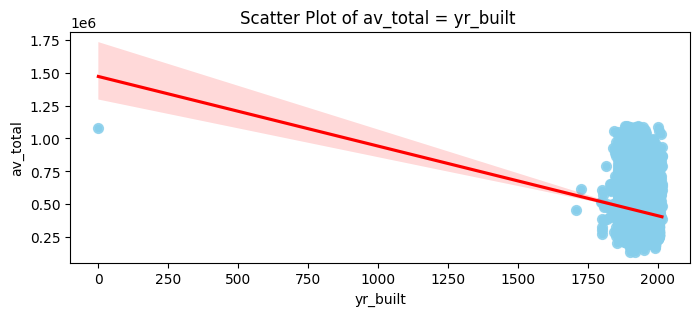

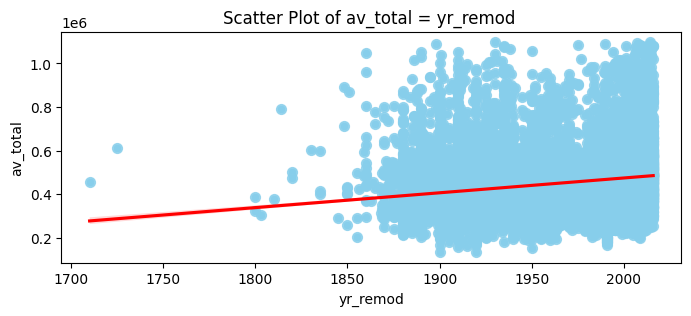

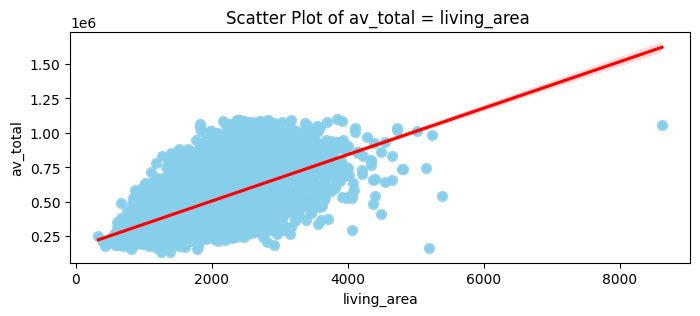

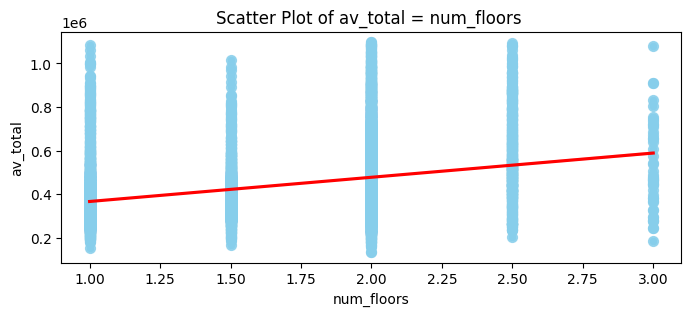

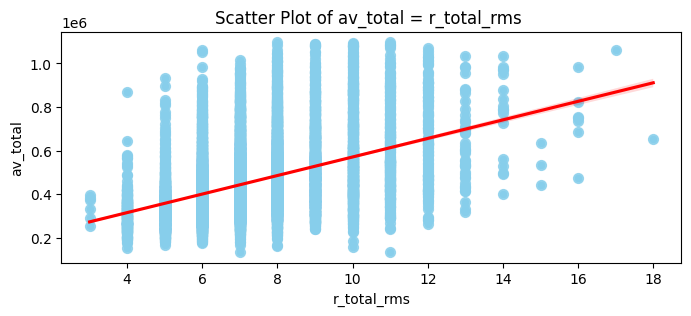

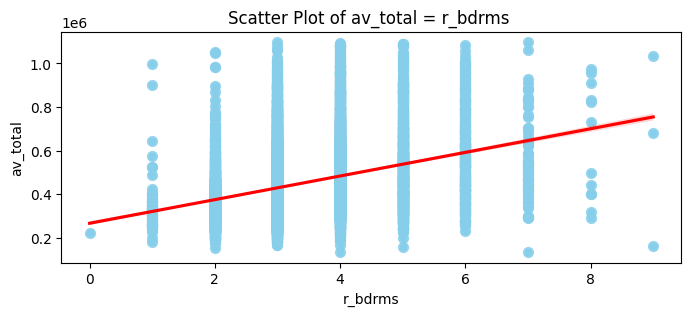

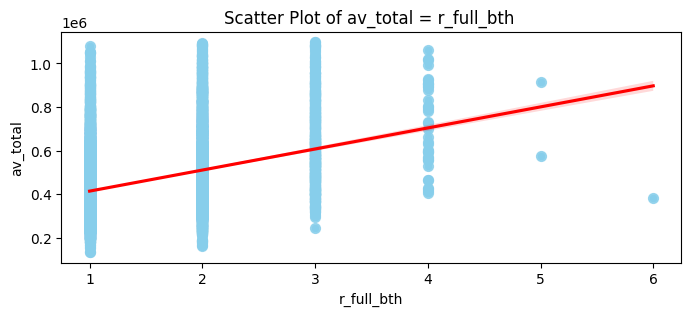

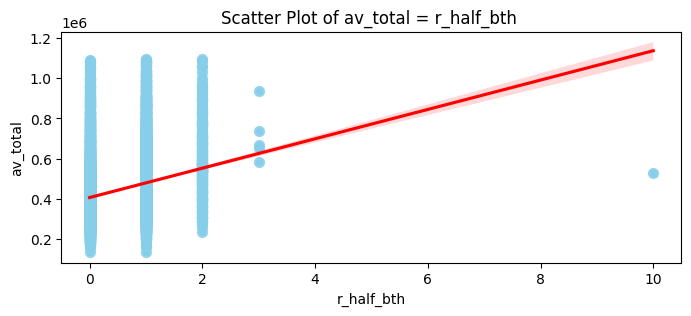

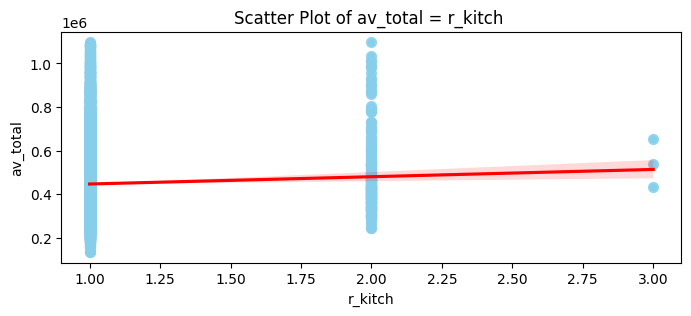

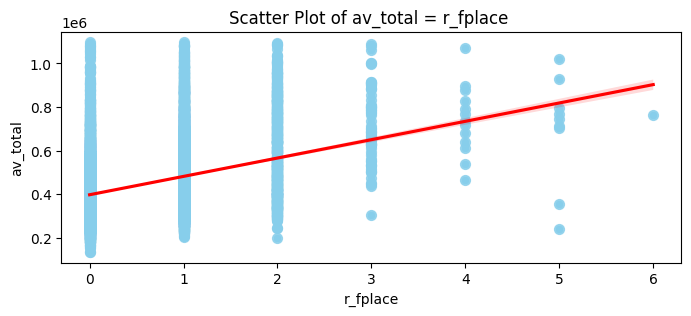

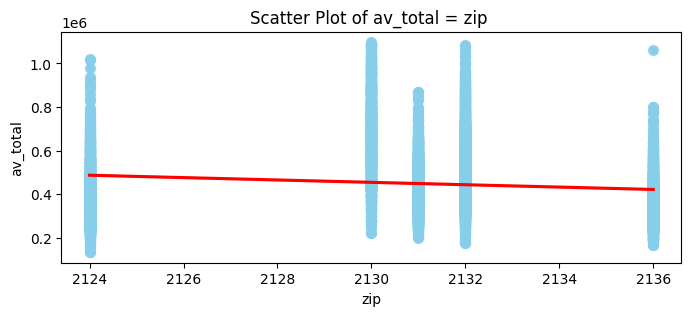

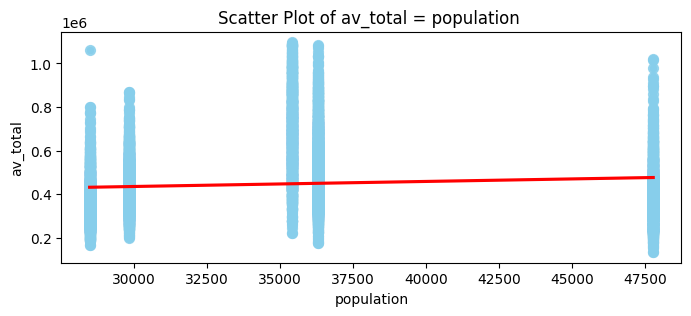

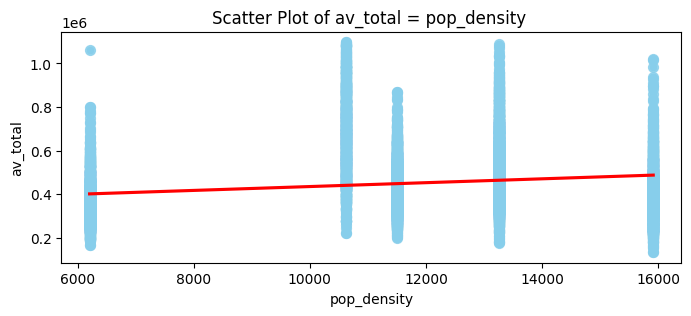

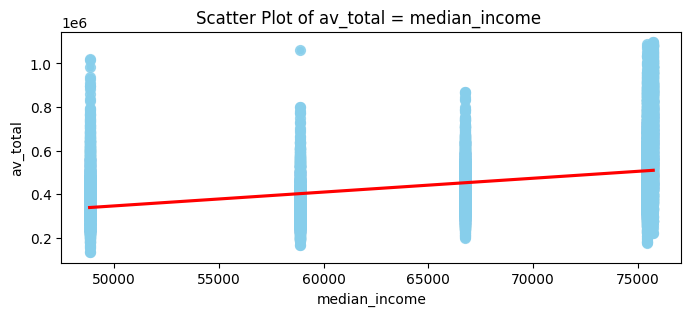

In [14]:
for feature in numeric_features:
  if feature != 'av_total':
    # Set the figure size
    plt.figure(figsize=(8, 3))
    # Create the histogram using seaborn
    sns.scatterplot(boston, x=feature, y='av_total', color='skyblue')
    # if you want a linear line
    # sns.regplot(wake,x=feature, y='sale_price', scatter_kws={'s': 50, 'color': 'blue'}, line_kws={'color': 'red'})
    # Set the title and x-label
    sns.regplot(boston,x=feature, y='av_total', scatter_kws={'s': 50, 'color': 'skyblue'}, line_kws={'color': 'pink'})
    plt.title(f'Scatter Plot of av_total = {feature} ')
    plt.xlabel(feature)
    plt.ylabel('av_total')
    # Display the plot
    plt.show()

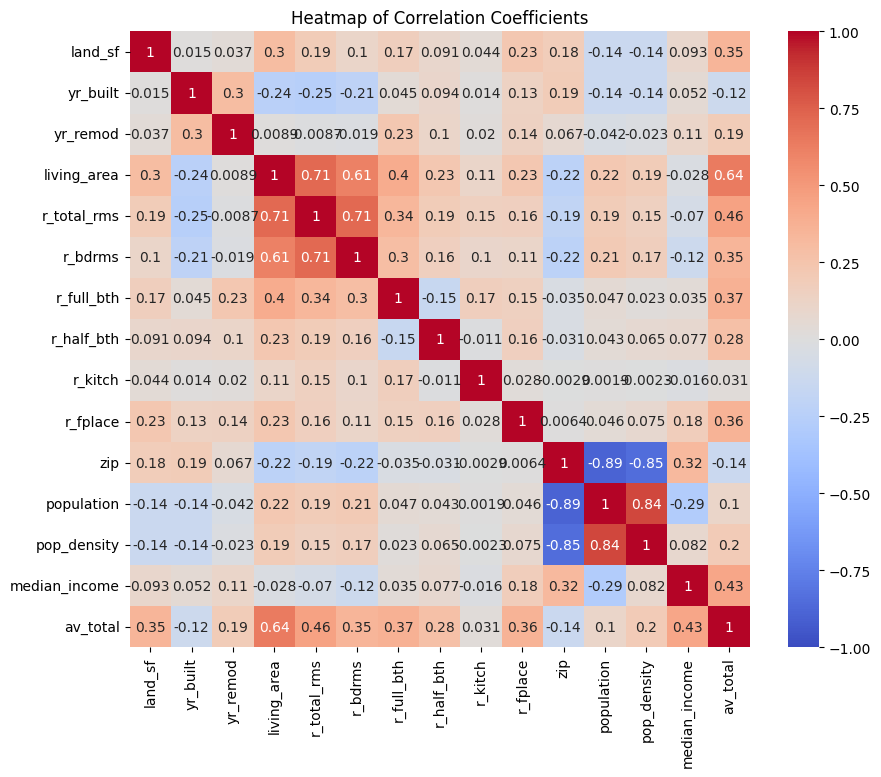

In [33]:
# Calculating the correlation matrix
correlation_matrix_boston = boston[numeric_features_selected].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_boston, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation Coefficients')
plt.show()

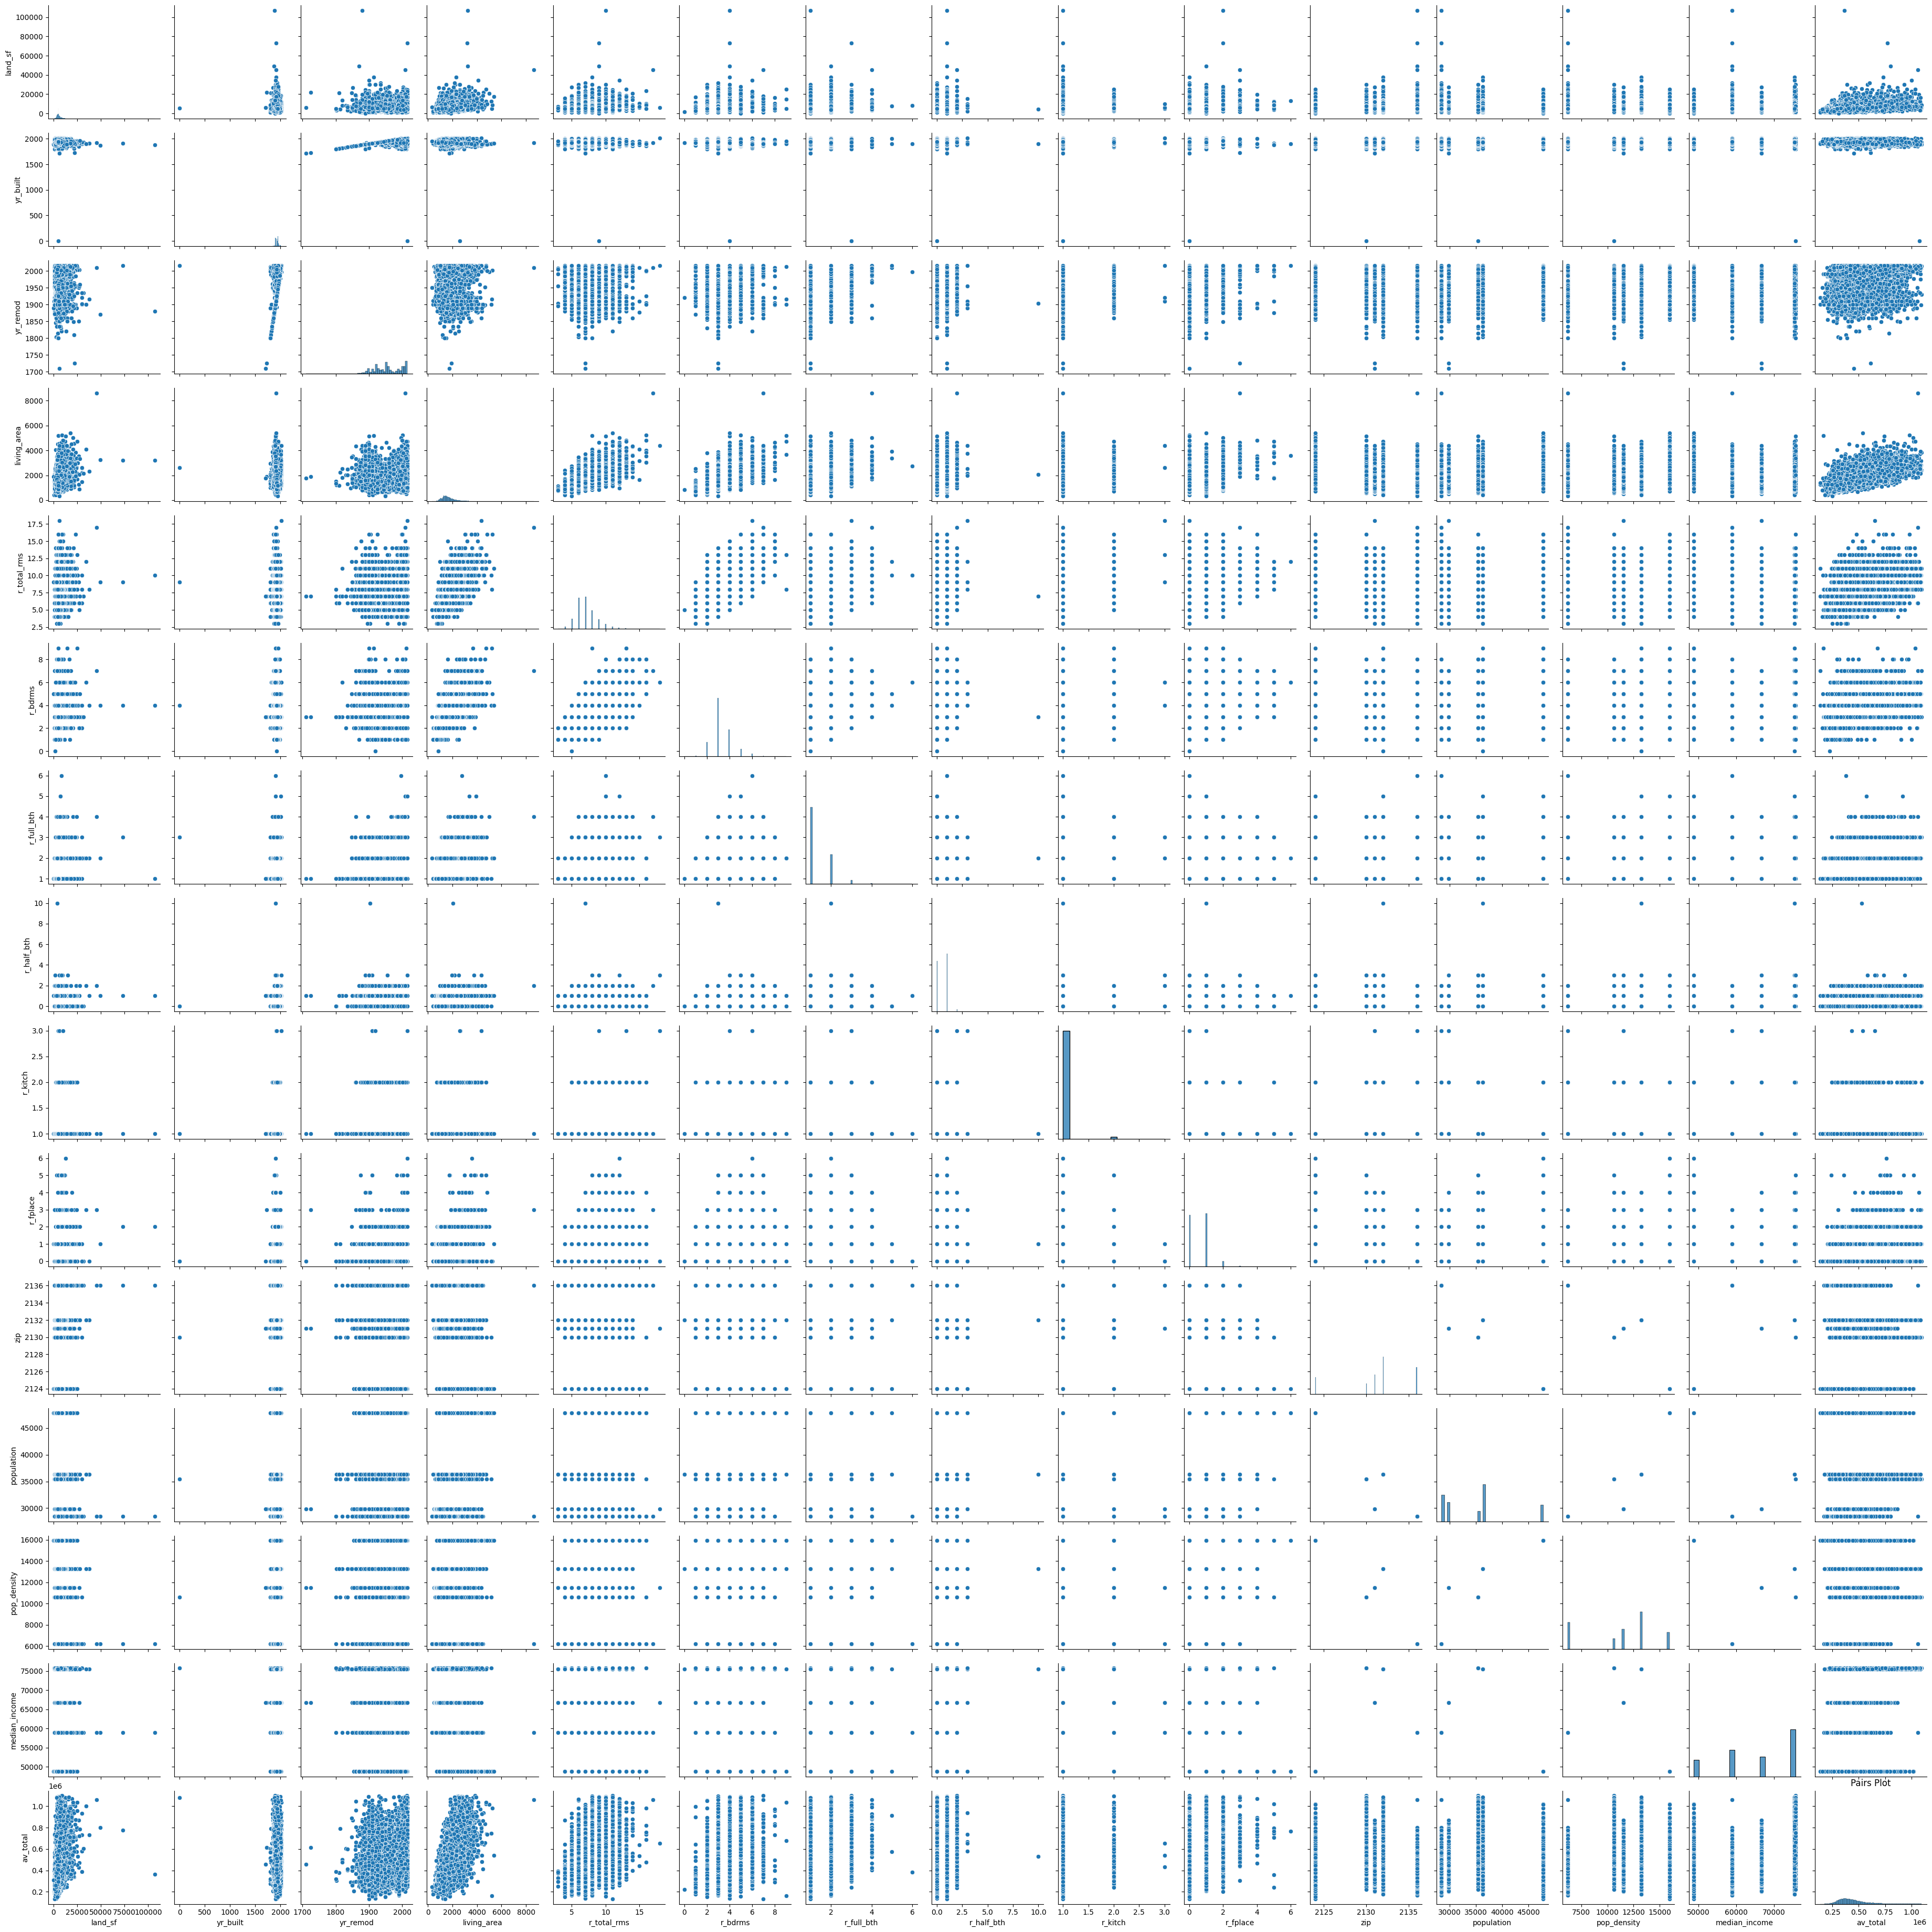

In [34]:
sns.pairplot(boston[numeric_features_selected])
plt.title('Pairs Plot')
plt.show()

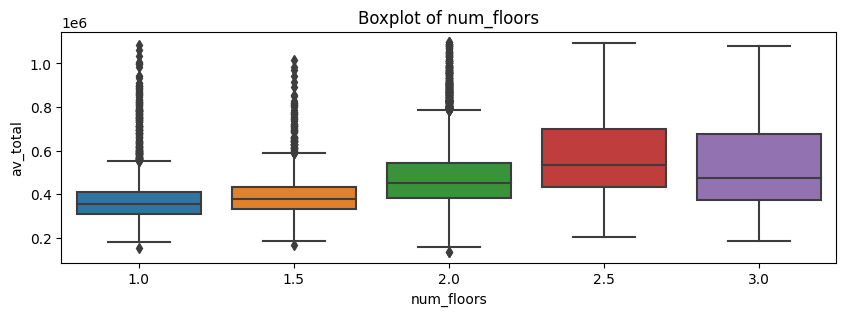

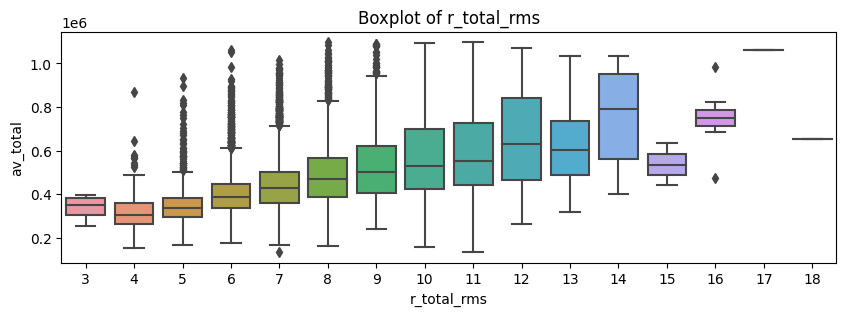

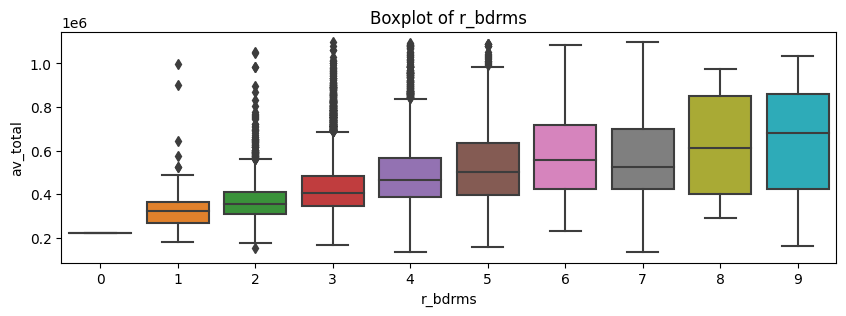

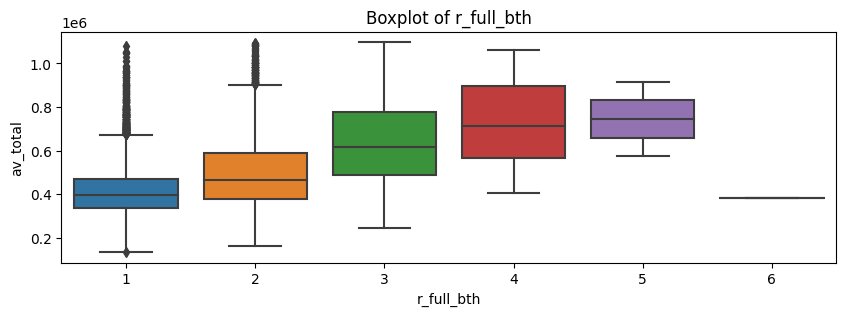

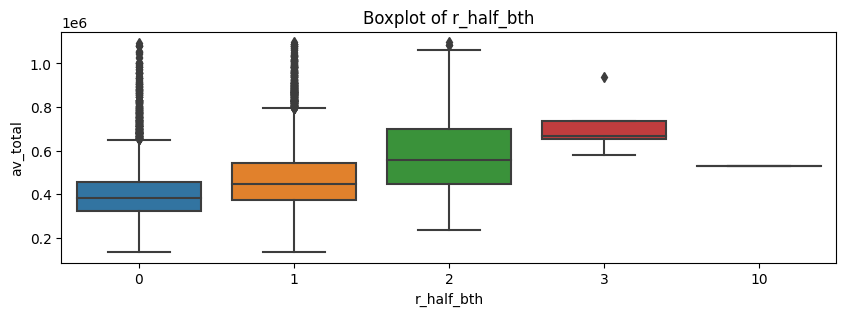

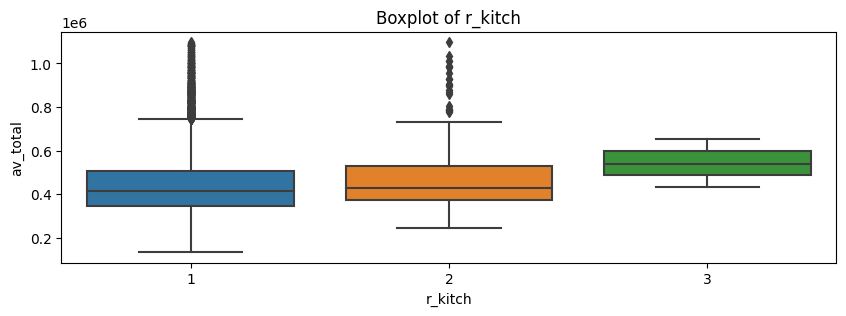

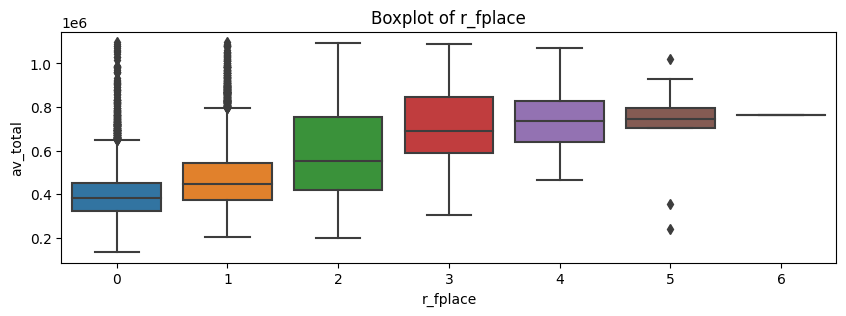

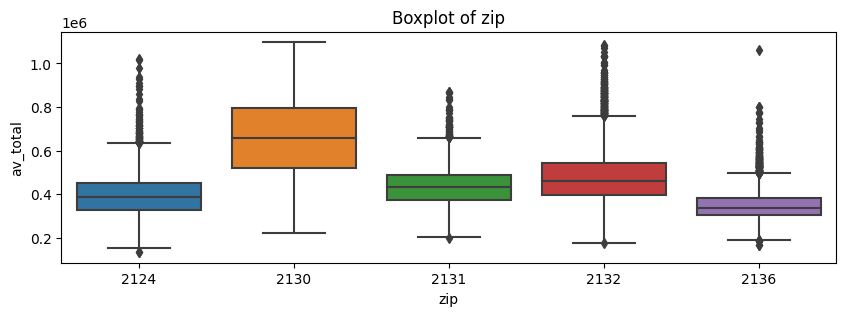

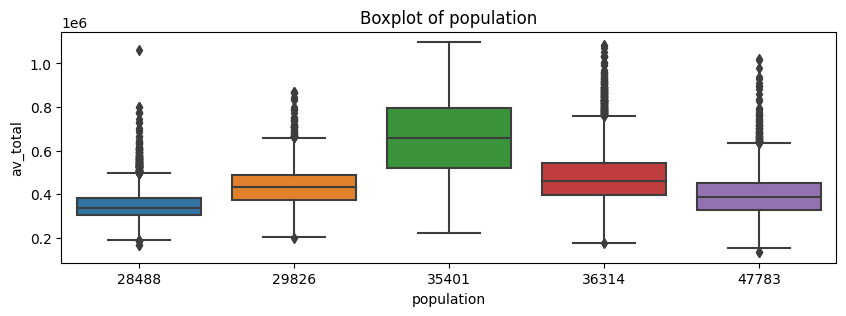

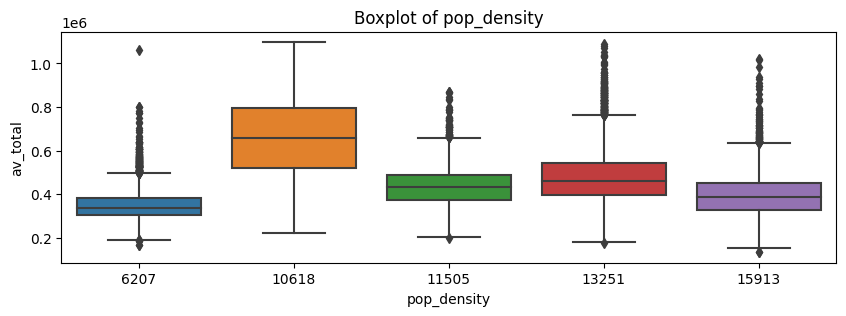

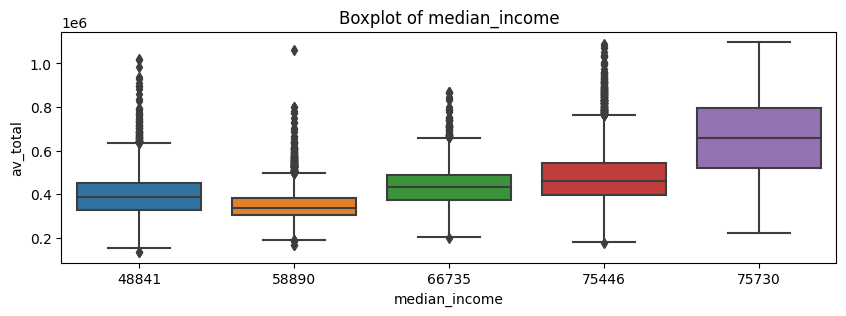

In [37]:
features_categorical = ['num_floors', 'r_total_rms', 'r_bdrms', 'r_full_bth',
                  'r_half_bth', 'r_kitch', 'r_fplace', 'zip', 'population',
                  'pop_density', 'median_income']
for feature in features_categorical:
  # Set the figure size
  plt.figure(figsize=(10, 3))
  # Create the histogram using seaborn
  sns.boxplot(x=boston[feature],y=boston['av_total'], data=boston)
  # Set the title and x-label
  plt.title(f'Boxplot of {feature}')
  plt.xlabel(feature)
  # Display the plot
  plt.show()

# Model performance


In [18]:
pred1 = pd.read_csv('/content/model1_predictions.csv')

In [19]:
boston_prep1 = boston.merge(pred1,on = 'pid')
boston_prep1['residual'] = boston_prep1['av_total']-boston_prep1['pred']
boston_prep1.head()

pid  zipcode own_occ    land_sf  yr_built  yr_remod  living_area  \
0   10     2136       Y 10288.0000      1992 1992.0000         1681   
1   20     2132       Y 10148.0000      1900 2016.0000         3024   
2   30     2132       Y  8512.0000      1920 1920.0000         1160   
3   40     2124       Y  3187.0000      1900 2001.0000         1868   
4   50     2136       Y 10088.0000      1971 1975.0000         1534   

   num_floors structure_class r_bldg_styl  ... r_int_fin r_view   zip  \
0      1.0000               R          RR  ...         N      A  2136   
1      2.5000               R          CL  ...         N      G  2132   
2      2.0000               R          CL  ...         N      A  2132   
3      2.0000               R          CL  ...         N      F  2124   
4      1.0000               R          RR  ...         N      G  2136   

   population  pop_density  median_income             city_state    av_total  \
0       28488         6207          58890          Hyde Park, MA 321200.0000   
1       36314        13251          75446          Cambridge, MA 845475.9346   
2       36314        13251          75446          Cambridge, MA 401230.0313   
3       47783        15913          48841  Dorchester Center, MA 450500.0000   
4       28488         6207          58890          Hyde Park, MA 368094.7401   

         pred     residual  
0 492976.2739 -171776.2739  
1 696277.0579  149198.8767  
2 393368.8548    7861.1765  
3 458700.8346   -8200.8346  
4 467320.9977  -99226.2576  

[5 rows x 35 columns]

In [20]:
boston_prep1[['av_total','pred','residual']].head()

av_total        pred     residual
0 321200.0000 492976.2739 -171776.2739
1 845475.9346 696277.0579  149198.8767
2 401230.0313 393368.8548    7861.1765
3 450500.0000 458700.8346   -8200.8346
4 368094.7401 467320.9977  -99226.2576

In [21]:
pred2 = pd.read_csv('/content/model2_predictions.csv')

In [22]:
boston_prep2 = boston.merge(pred2,on = 'pid')
boston_prep2['residual'] = boston_prep2['av_total']-boston_prep2['pred']
boston_prep2.head()

pid  zipcode own_occ    land_sf  yr_built  yr_remod  living_area  \
0   10     2136       Y 10288.0000      1992 1992.0000         1681   
1   20     2132       Y 10148.0000      1900 2016.0000         3024   
2   30     2132       Y  8512.0000      1920 1920.0000         1160   
3   40     2124       Y  3187.0000      1900 2001.0000         1868   
4   50     2136       Y 10088.0000      1971 1975.0000         1534   

   num_floors structure_class r_bldg_styl  ... r_int_fin r_view   zip  \
0      1.0000               R          RR  ...         N      A  2136   
1      2.5000               R          CL  ...         N      G  2132   
2      2.0000               R          CL  ...         N      A  2132   
3      2.0000               R          CL  ...         N      F  2124   
4      1.0000               R          RR  ...         N      G  2136   

   population  pop_density  median_income             city_state    av_total  \
0       28488         6207          58890          Hyde Park, MA 321200.0000   
1       36314        13251          75446          Cambridge, MA 845475.9346   
2       36314        13251          75446          Cambridge, MA 401230.0313   
3       47783        15913          48841  Dorchester Center, MA 450500.0000   
4       28488         6207          58890          Hyde Park, MA 368094.7401   

         pred    residual  
0 318559.3750   2640.6250  
1 828821.6250  16654.3096  
2 411252.3125 -10022.2812  
3 432201.1875  18298.8125  
4 366862.2500   1232.4901  

[5 rows x 35 columns]

In [23]:
import math
# calculate stats
r2_1 = r2_score(boston_prep1['av_total'], boston_prep1['pred'])
mse_1 = mean_squared_error(boston_prep1['av_total'], boston_prep1['pred'])
# mae_1 = mean_absolute_error(boston_prep1['av_total'], boston_prep1['pred'])
rmse_1 = math.sqrt(mse_1)
print("-- Linear Regression Stats for Wake County -- ")
print(f'R-Square: {r2_1:.3f}')
print(f" - RSQUARE: approximately {r2_1:.1%} of the variability in the sale prices can be explained by our model.")

print(f'Mean Squared Error: {mse_1:,.2f}')
print(f" - MSE: on average, our predictions are approximately ${mse_1:,.2f} away from the actual sale price")
print(f'Root Mean Squared Error: {rmse_1:,.2f}')
print(f" - RMSE:  on average, the predictions made by the model are off by +/- ${rmse_1:,.2f} from the actual")


-- Linear Regression Stats for Wake County -- 
R-Square: 0.438
 - RSQUARE: approximately 43.8% of the variability in the sale prices can be explained by our model.
Mean Squared Error: 11,646,391,102.16
 - MSE: on average, our predictions are approximately $11,646,391,102.16 away from the actual sale price
Root Mean Squared Error: 107,918.45
 - RMSE:  on average, the predictions made by the model are off by +/- $107,918.45 from the actual


In [29]:
# calculate stats
r2_2 = r2_score(boston_prep2['av_total'], boston_prep2['pred'])
mse_2 = mean_squared_error(boston_prep2['av_total'], boston_prep2['pred'])
# mae_2 = mean_absolute_error(boston_prep2['av_total'], boston_prep2['pred'])
rmse_2 = math.sqrt(mse_2)
print("-- Linear Regression Stats for Wake County -- ")
print(f'R-Square: {r2_2:.3f}')
print(f" - RSQUARE: approximately {r2_2:.1%} of the variability in the sale prices can be explained by our model.")
print(f'Mean Squared Error: {mse_2:,.2f}')
print(f" - MSE: on average, our predictions are approximately ${mse_2:,.2f} away from the actual sale price")
print(f'Root Mean Squared Error: {rmse_2:,.2f}')
print(f" - RMSE: on average, our predictions are approximately ${rmse_2:,.2f} away from the actual sale price")


-- Linear Regression Stats for Wake County -- 
R-Square: 0.948
 - RSQUARE: approximately 94.8% of the variability in the sale prices can be explained by our model.
Mean Squared Error: 1,081,984,107.82
 - MSE: on average, our predictions are approximately $1,081,984,107.82 away from the actual sale price
Root Mean Squared Error: 32,893.53
 - RMSE: on average, our predictions are approximately $32,893.53 away from the actual sale price


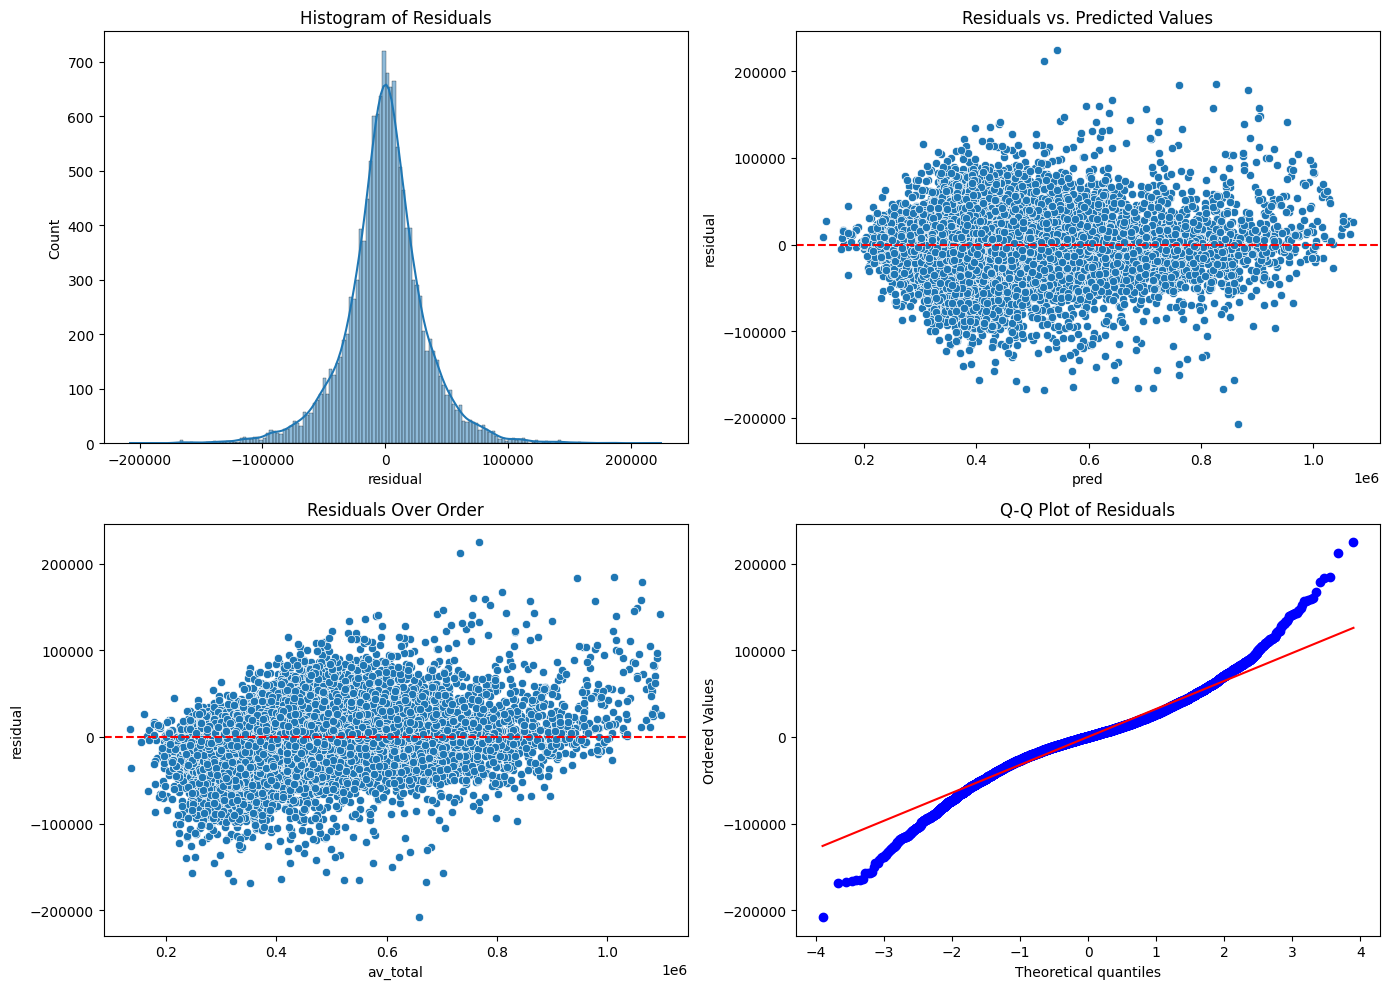

In [46]:
import scipy.stats as stats

# Set up a 2x2 grid for plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Plot histogram of residuals
sns.histplot(boston_prep2['residual'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of Residuals')

# Scatter plot of predicted values vs. residuals
sns.scatterplot(data=boston_prep2, x='pred', y='residual', ax=axes[0, 1])
axes[0, 1].axhline(y=0, color='r', linestyle='--')
axes[0, 1].set_title('Residuals vs. Predicted Values')

# Plot residuals over order (using index as a proxy for order)
sns.scatterplot(data=boston_prep2, x='av_total', y='residual', ax=axes[1, 0])
axes[1, 0].axhline(y=0, color='r', linestyle='--')
axes[1, 0].set_title('Residuals Over Order')


# Q-Q plot of residuals
stats.probplot(boston_prep2['residual'], dist="norm", plot=axes[1, 1])
axes[1, 1].set_title('Q-Q Plot of Residuals')

# Adjust layout
plt.tight_layout()
plt.show()




Based on R square, model 2 would be better estimate than model 1


# Top and bottom 10 record predictions

In [25]:
boston_prep2['abs_residual'] = boston_prep2['residual'].abs()
# boston_prep['abs_residual']
boston_prep2.nsmallest(10,'abs_residual')

pid  zipcode own_occ   land_sf  yr_built  yr_remod  living_area  \
13147  131520     2136       Y 6000.0000      1911 2013.0000         1182   
2131    21340     2131       Y 5163.0000      1920 1920.0000         1068   
47        480     2132       Y 5987.0000      1960 1960.0000          972   
2050    20530     2124       Y 2342.0000      1890 1970.0000         1478   
3848    38520     2124       Y 6420.0000      1880 2006.0000         2161   
8448    84520     2132       Y 5481.0000      1930 1930.0000         1450   
11637  116420     2131       Y 5464.0000      1880 1880.0000         1799   
11523  115280     2136       Y 5725.0000      1884 1884.0000         1344   
12648  126530     2132       Y 5604.0000      2008       NaN         2118   
9486    94900     2131       Y 5610.0000      1918       NaN         1527   

       num_floors structure_class r_bldg_styl  ... r_view   zip  population  \
13147      2.0000               R          CL  ...      A  2136       28488   
2131       1.0000               R          BW  ...      A  2131       29826   
47         1.0000               R          RN  ...      A  2132       36314   
2050       2.0000               R          CL  ...      A  2124       47783   
3848       2.0000               R          VT  ...      A  2124       47783   
8448       2.0000               R          CL  ...      A  2132       36314   
11637      2.0000               R          CL  ...      A  2131       29826   
11523      1.5000               R          CL  ...      A  2136       28488   
12648      2.0000               R          CL  ...      A  2132       36314   
9486       2.0000               R          CL  ...      A  2131       29826   

       pop_density  median_income             city_state    av_total  \
13147         6207          58890          Hyde Park, MA 332042.1316   
2131         11505          66735         Roslindale, MA 359000.0000   
47           13251          75446          Cambridge, MA 344800.0000   
2050         15913          48841  Dorchester Center, MA 285886.7055   
3848         15913          48841  Dorchester Center, MA 658200.0000   
8448         13251          75446          Cambridge, MA 454388.7767   
11637        11505          66735         Roslindale, MA 451563.1848   
11523         6207          58890          Hyde Park, MA 314484.7140   
12648        13251          75446          Cambridge, MA 553200.0000   
9486         11505          66735         Roslindale, MA 382567.6008   

             pred residual abs_residual  
13147 332043.6562  -1.5246       1.5246  
2131  359010.5312 -10.5312      10.5312  
47    344813.3750 -13.3750      13.3750  
2050  285902.5938 -15.8883      15.8883  
3848  658181.5000  18.5000      18.5000  
8448  454407.9062 -19.1296      19.1296  
11637 451585.1250 -21.9402      21.9402  
11523 314506.9688 -22.2548      22.2548  
12648 553175.8750  24.1250      24.1250  
9486  382593.0938 -25.4929      25.4929  

[10 rows x 36 columns]

In [27]:
boston_prep2.nsmallest(10,'residual')

pid  zipcode own_occ    land_sf  yr_built  living_area  num_floors  \
3890    38940     2130       Y  9000.0000      1915         2594      2.0000   
9237    92410     2131       Y  7280.0000      1910         2150      2.0000   
12242  122470     2130       Y  5600.0000      1900         2880      2.0000   
6850    68540     2131       Y  5894.0000      1908         2043      2.0000   
10630  106350     2130       N  6945.0000      1890         2492      2.5000   
13404  134090     2130       Y  5752.0000      1910         2067      2.0000   
531      5320     2131       Y 10246.0000      1890         2630      2.0000   
10627  106320     2130       Y  2800.0000      1945         1572      2.0000   
4367    43710     2124       Y  4923.0000      1960         1176      2.0000   
7515    75190     2130       Y 12960.0000      1910         2709      2.0000   

      structure_class r_bldg_styl r_roof_typ  ... r_view   zip  population  \
3890                R          CL          G  ...      A  2130       35401   
9237                R          CL          G  ...      A  2131       29826   
12242               R          CL          L  ...      A  2130       35401   
6850                R          CL          H  ...      A  2131       29826   
10630               R          CL          H  ...      A  2130       35401   
13404               R          CL          L  ...      A  2130       35401   
531                 R          CL          M  ...      A  2131       29826   
10627               R          CL          G  ...      P  2130       35401   
4367                R          CL          G  ...      A  2124       47783   
7515                R          CL          G  ...      A  2130       35401   

       pop_density  median_income             city_state    av_total  \
3890         10618          75730      Jamaica Plain, MA 657900.0000   
9237         11505          66735         Roslindale, MA 351800.0000   
12242        10618          75730      Jamaica Plain, MA 671200.0000   
6850         11505          66735         Roslindale, MA 322100.0000   
10630        10618          75730      Jamaica Plain, MA 549800.0000   
13404        10618          75730      Jamaica Plain, MA 521800.0000   
531          11505          66735         Roslindale, MA 407800.0000   
10627        10618          75730      Jamaica Plain, MA 313100.0000   
4367         15913          48841  Dorchester Center, MA 247800.0000   
7515         10618          75730      Jamaica Plain, MA 701400.0000   

             pred     residual abs_residual  
3890  865683.0625 -207783.0625  207783.0625  
9237  520393.0625 -168593.0625  168593.0625  
12242 838272.0000 -167072.0000  167072.0000  
6850  488623.1562 -166523.1562  166523.1562  
10630 715284.3750 -165484.3750  165484.3750  
13404 687193.4375 -165393.4375  165393.4375  
531   572399.4375 -164599.4375  164599.4375  
10627 470196.7812 -157096.7812  157096.7812  
4367  404759.9688 -156959.9688  156959.9688  
7515  858199.5000 -156799.5000  156799.5000  

[10 rows x 35 columns]

In [28]:
boston_prep2.nlargest(10,'residual')

pid  zipcode own_occ   land_sf  yr_built  living_area  num_floors  \
11270  112750     2130       Y 3645.0000      1960         1421      2.0000   
652      6530     2130       Y 4377.0000      1950         1584      2.0000   
7848    78520     2130       N 6625.0000      1931         1972      2.0000   
5176    51800     2130       Y 8731.0000      1927         1770      2.0000   
6047    60510     2130       Y 5966.0000      1955         1833      1.0000   
3755    37590     2130       Y 5303.0000      1965         1387      1.5000   
1581    15830     2130       N 5888.0000      1964         1352      2.0000   
2625    26290     2130       Y 4590.0000      1983         1184      2.0000   
13000  130050     2130       Y 6960.0000      1935         2209      2.0000   
13844  138490     2130       Y 4235.0000      1910         2124      2.0000   

      structure_class r_bldg_styl r_roof_typ  ... r_view   zip  population  \
11270               R          CL          G  ...      A  2130       35401   
652                 R          CL          G  ...      A  2130       35401   
7848                R          CL          G  ...      A  2130       35401   
5176                R          CL          G  ...      A  2130       35401   
6047                R          CP          G  ...      G  2130       35401   
3755                R          CP          G  ...      A  2130       35401   
1581                R          CL          G  ...      A  2130       35401   
2625                R          SD          G  ...      A  2130       35401   
13000               R          CL          G  ...      A  2130       35401   
13844               R          CL          G  ...      A  2130       35401   

       pop_density  median_income         city_state     av_total        pred  \
11270        10618          75730  Jamaica Plain, MA  767500.0000 542955.3125   
652          10618          75730  Jamaica Plain, MA  732300.0000 519895.8750   
7848         10618          75730  Jamaica Plain, MA 1011700.0000 826599.8750   
5176         10618          75730  Jamaica Plain, MA  944600.0000 760980.6875   
6047         10618          75730  Jamaica Plain, MA 1062620.0000 883951.8125   
3755         10618          75730  Jamaica Plain, MA  809300.0000 642110.1875   
1581         10618          75730  Jamaica Plain, MA  755500.0000 595222.0000   
2625         10618          75730  Jamaica Plain, MA  777500.0000 617846.3750   
13000        10618          75730  Jamaica Plain, MA 1060314.0000 902510.0625   
13844        10618          75730  Jamaica Plain, MA  978400.0000 821302.3125   

         residual abs_residual  
11270 224544.6875  224544.6875  
652   212404.1250  212404.1250  
7848  185100.1250  185100.1250  
5176  183619.3125  183619.3125  
6047  178668.1875  178668.1875  
3755  167189.8125  167189.8125  
1581  160278.0000  160278.0000  
2625  159653.6250  159653.6250  
13000 157803.9375  157803.9375  
13844 157097.6875  157097.6875  

[10 rows x 35 columns]

In [23]:
boston.columns

Index(['pid', 'zipcode', 'own_occ', 'land_sf', 'yr_built', 'yr_remod',
       'living_area', 'num_floors', 'structure_class', 'r_bldg_styl',
       'r_roof_typ', 'r_ext_fin', 'r_total_rms', 'r_bdrms', 'r_full_bth',
       'r_half_bth', 'r_bth_style', 'r_kitch', 'r_kitch_style', 'r_heat_typ',
       'r_ac', 'r_fplace', 'r_ext_cnd', 'r_ovrall_cnd', 'r_int_cnd',
       'r_int_fin', 'r_view', 'zip', 'population', 'pop_density',
       'median_income', 'city_state', 'av_total'],
      dtype='object')

In [17]:
x = boston.drop(columns=['pid', 'zipcode', 'own_occ', 'yr_built', 'yr_remod',
                         'num_floors', 'structure_class', 'r_bldg_styl',
                         'r_roof_typ', 'r_ext_fin', 'r_total_rms', 'r_bdrms', 'r_full_bth',
                         'r_half_bth', 'r_bth_style', 'r_kitch', 'r_kitch_style', 'r_heat_typ',
                         'r_ac', 'r_fplace', 'r_ext_cnd', 'r_ovrall_cnd', 'r_int_cnd',
                         'r_int_fin', 'r_view', 'zip', 'population', 'pop_density',
                         'city_state', 'av_total'])
y = boston['av_total']
x = sm.add_constant(x)
fullreg = sm.OLS(y, x).fit()
print(fullreg.summary())
x

                            OLS Regression Results                            
Dep. Variable:               av_total   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     7502.
Date:                Thu, 17 Aug 2023   Prob (F-statistic):               0.00
Time:                        20:02:13   Log-Likelihood:            -1.7557e+05
No. Observations:               13712   AIC:                         3.511e+05
Df Residuals:                   13708   BIC:                         3.512e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.793e+05   5703.593    -48.963

const    land_sf  living_area  median_income
0     1.0000 10288.0000         1681          58890
1     1.0000 10148.0000         3024          75446
2     1.0000  8512.0000         1160          75446
3     1.0000  3187.0000         1868          48841
4     1.0000 10088.0000         1534          58890
...      ...        ...          ...            ...
14220 1.0000  3717.0000         1703          48841
14221 1.0000  3895.0000         1350          75446
14222 1.0000  4700.0000         1490          75446
14223 1.0000  5250.0000         1404          48841
14224 1.0000  5000.0000         1157          58890

[13712 rows x 4 columns]